# Анализ рынка недвижимости в Санкт-Петербурге и области

Для анализа предоставлены данные сервиса Яндекс.Недвижимость, которые содержат  архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных (расстояние до центра, аэропорта, ближайшего парка и водоёма).

Цель исследования: оценить параметры продаваемых квартир и определить, какие факторы влияют на стоимость недвижимости.

Согласно документации:
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м);
- balcony — число балконов;
- ceiling_height — высота потолков (м);
- cityCenters_nearest — расстояние до центра города (м);
- days_exposition — сколько дней было размещено объявление (от публикации до снятия);
- first_day_exposition — дата публикации;
- floor — этаж;
- floors_total — всего этажей в доме;
- is_apartment — апартаменты (булев тип);
- kitchen_area — площадь кухни в квадратных метрах (м²);
- last_price — цена на момент снятия с публикации;
- living_area — жилая площадь в квадратных метрах (м²);
- locality_name — название населённого пункта;
- open_plan — свободная планировка (булев тип);
- parks_around3000 — число парков в радиусе 3 км;
- parks_nearest — расстояние до ближайшего парка (м);
- ponds_around3000 — число водоёмов в радиусе 3 км;
- ponds_nearest — расстояние до ближайшего водоёма (м);
- rooms — число комнат;
- studio — квартира-студия (булев тип);
- total_area — площадь квартиры в квадратных метрах (м²);
- total_images — число фотографий квартиры в объявлении.

## План работы

1. [Изучение данных](#1)

2. [Предобработка данных](#2)

    2.1  [Стиль заголовков](#2.1)

    2.2  [Обработка пропусков](#2.2)

    2.3 [Замена типа данных](#2.3)

    2.4 [Расчёты и добавление результатов в таблицу](#2.4)

3. [Исследовательский анализ данных](#3)

    2.1 [Оценка параметров квартир и времени продаж](#3.1)

    2.2 [Факторы, влияющие на стоимость квартиры](#3.2)

    2.3 [Влияние даты публикации](#3.3)

    2.4 [Оценка населённых пунктов по числу объявлений](#3.4)

    2.5 [Исследование зависимости цены и удаленности от центра](#3.5)

    2.6 [Анализ квартир в центре Санкт-Петербурга](#3.6)

4. [Общие выводы](#4)

<a name="1"><h2>1 Изучение данных</h2></a>

Импортируем библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
dt = datetime.datetime.now()
import matplotlib
matplotlib.style.use('seaborn-dark')
%config InlineBackend.figure_format = 'retina'

Прочитаем файл и сохраним в переменной data:

In [2]:
data = pd.read_csv('/content/real_estate_data.csv', sep='\t')

Выведем на экран первые 10 строк и просмотрим общую информацию о таблице:

In [3]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В таблице 22 столбца. В каждой строке таблицы данные, которые содержат информацию о параметрах квартиры, выставленной на продажу. Всего 23699 записей.

<div style="border: solid green 2px; padding: 20px">

**Выводы**
* В таблице 14 столбцов содержат пропущенные значения.
* Столбец с датой публикации имеет формат object, поэтому следует привести данные в формат даты.
* В колонках 'last_price', 'floors_total', 'balcony', 'cityCenters_nearest', 'parks_around3000', 'ponds_around3000', 'ponds_nearest', 'days_exposition' тип float можно привести в целочисленный формат.
* Согласно документации столбец 'is_apartment' типа bool, а в общей инофрмации тип object.
* Название в колонке cityCenters_nearest в регистре CamelCase заменим на 'змеиный' регистр.</div>

<a name="2"><h2>2 Предобработка данных</h2></a>

<a name="2.1"><h3>2.1 Стиль заголовков</h3></a>

Переименуем столбец cityCenters_nearest:

In [5]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

Проверим результат:

In [6]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_centers_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

<a name="2.2"><h3>2.2 Обработка пропусков</h3></a>

Подсчитаем процент пропусков:

In [7]:
data.isna().mean().round(4)*100

total_images             0.00
last_price               0.00
total_area               0.00
first_day_exposition     0.00
rooms                    0.00
ceiling_height          38.80
floors_total             0.36
living_area              8.03
floor                    0.00
is_apartment            88.29
studio                   0.00
open_plan                0.00
kitchen_area             9.61
balcony                 48.61
locality_name            0.21
airports_nearest        23.38
city_centers_nearest    23.29
parks_around3000        23.28
parks_nearest           65.91
ponds_around3000        23.28
ponds_nearest           61.56
days_exposition         13.42
dtype: float64

Рассмотрим строки, содержащие пропуски:
* Cтроки с отсутсвующей информацией о количестве этажей в доме 'floors_total' и названии населенного пункта в столбце 'locality_name' составляют 0,36% и 0,2% соответственно, поэтому их можно удалить.
* Высоту потолков 'ceiling_height' заменим на медианное значение.
* Жилую площадь 'living_area' можно заполнить разностью общей площади и площади кухни total_area-kitchen_area, но так как в столбце kitchen_area тоже есть пропуски, то заполним сначала его.
* Для площади кухни 'kitchen_area' подсчитаем процент соотношения общей площади к кухне и заменим соответствующим средним или медианным значением.
* В столбце is_apartment заменим пропуски на False, так как предположим, что если человек не заполнил это поле, то данное жильё не является апартаментами.
* Если не указана информация о количетсве балконов в колонке 'balcony', то скорее всего их нет и такие пропукси можно заменить на ноль.
* Расстояние до аэропорта 'airports_nearest' заполним медианой по населенным пунктам, кроме Санкт-Петербурга, так как нельзя точно сказать в какой части города находится продаваемая квартира.
* В столбце 'city_centers_nearest' для местностей, которые не относятся к Санкт-Петербургу, укажем расстояние 0 до центра города, так как такие населенные пункты небольшие. Для квартир в Санкт-Петербурге будет некорректно поставить какое-то определенное значение, так как реальное расположение может быть и в центре, и на окраине.
* Отсутвие информации о количестве парков и прудов в столбцах 'parks_around3000' и 'ponds_around3000', вероятнее всего означает, что рядом их нет, поэтому заполним такие пропуски нулями.
* Колонки 'parks_nearest' и 'ponds_nearest' оставим без изменений.
* Для принятия решения о заполнении столбца 'days_exposition' сначала рассмотрим значения.

**Столбцы 'floors_total' и 'locality_name'**

Удаляем строки с пропусками в столбцах 'floors_total' и 'locality_name':

In [8]:
data = data.dropna(subset=['floors_total','locality_name']).reset_index(drop=True)

**Столбец 'ceiling_height'**

Рассчитаем медианное значение потолков. Так как дома в центре Санкт-Петербурга могут иметь более высокие потолки, чем в других районах, то рассчитаем высоту потолка для квартир в центре города и за его пределами отдельно. Если расстояние до центра города до 5 километров, то такие квартиры будем относить к центру.

In [9]:
ceiling_centre_median = data[data['city_centers_nearest'] < 5000]['ceiling_height'].median()
ceiling_outskirts_median = data[data['city_centers_nearest'] > 5000]['ceiling_height'].median()

Заменим пропуски в столбце 'ceiling_height' для квартир, расположенных в центре:

In [10]:
data.loc[(data['ceiling_height'].isna()) & (data['city_centers_nearest'] < 5000), 'ceiling_height'] = ceiling_centre_median

Остальные пустые значения заполним переменной 'ceiling_outskirts_median':

In [11]:
data.loc[data['ceiling_height'].isna(),'ceiling_height'] = ceiling_outskirts_median

Проверим результат:

In [12]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1865
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area             2222
balcony                 11475
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

**Столбец 'kitchen_area'**

Чтобы заполнить пропуски в столбце 'kitchen_area', сначала добавим в таблицу столбец с процентом площади кухни от общей площади:

In [13]:
data['percentage_kitchen_area'] = (data['kitchen_area'] * 100 / data['total_area']).round(2)

Определим, каким значением лучше заменять, для этого воспользуемся методом describe():

In [14]:
data['percentage_kitchen_area'].describe()

count    21343.000000
mean        18.733909
std          7.297871
min          2.540000
25%         13.330000
50%         17.240000
75%         23.240000
max         78.790000
Name: percentage_kitchen_area, dtype: float64

Так как разброс большой (от 2,5% до 78%) и выдающиеся значения смещает среднее, то лучше взять значение медианы.

In [15]:
median_kitchen_area = data['percentage_kitchen_area'].median()

Заменим пропуски, рассчитав соотношение общей площади и полученной медианы:

In [16]:
data.loc[data['kitchen_area'].isna(), 'kitchen_area'] = (data['total_area'] * median_kitchen_area / 100).round(2)

Теперь можно заполнить жилую площадь 'living_area', вычислив разность столбцов 'total_area' и 'kitchen_area':

In [17]:
data.loc[data['living_area'].isna(), 'living_area'] = data['total_area'] - data['kitchen_area']

Проверим, что пропусков в столбце 'living_area' больше нет:

In [18]:
data.isna().sum()

total_images                   0
last_price                     0
total_area                     0
first_day_exposition           0
rooms                          0
ceiling_height                 0
floors_total                   0
living_area                    0
floor                          0
is_apartment               20805
studio                         0
open_plan                      0
kitchen_area                   0
balcony                    11475
locality_name                  0
airports_nearest            5524
city_centers_nearest        5501
parks_around3000            5500
parks_nearest              15535
ponds_around3000            5500
ponds_nearest              14529
days_exposition             3171
percentage_kitchen_area     2222
dtype: int64

Перезапишем значения в столбце 'percentage_kitchen_area', чтобы устранить пропуски:

In [19]:
data['percentage_kitchen_area'] = (data['kitchen_area'] * 100 / data['total_area']).round(2)

**Столбец 'is_apartment'**

Заменим пропуски 'is_apartment' на False:

In [20]:
data.loc[data['is_apartment'].isna(), 'is_apartment'] = False

**Столбец 'balcony'**

Отсутсвующию информацию о количестве балконов заменяем на ноль:

In [21]:
data.loc[data['balcony'].isna(), 'balcony'] = 0

**Столбец 'airports_nearest'**

Для заполнения столбца 'airports_nearest', мы будем группировать данные по населённым пунктам, но так как названия местности люди могли написать по-разному, то сначала следует устранить возможные дубликаты. 

Просмотрим уникальные названия:

In [22]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

В списке встречаются 'поселок' и 'посёлок', 'городской посёлок' и 'посёлок городского типа', 'посёлок станции' и 'посёлок при железнодорожной станции'. Так как список объемный и можно не заметить какие-то неявные дуликаты, то уберем описание типа местности и оставим только название населенного пункта:

Чтобы была возможность проверить каждое слово по отдельности, воспользуемся методом split(), который разобьет строку на слова:

In [23]:
split_locality_name = data['locality_name'].str.split()

С помощью цикла отберем список слов, которые не содержат прописные буквы:

In [24]:
types_locality = []
for locality_name in split_locality_name:
    for word in locality_name:
        if word.islower() == True:
            types_locality.append(word)

Переведем лист в Series, удалим дубликаты  и выведем список для проверки:

In [25]:
types_locality_drop = pd.Series(types_locality).drop_duplicates().reset_index(drop=True)
types_locality_drop

0             посёлок
1           городской
2             деревня
3             поселок
4          городского
5                типа
6             садовое
7        товарищество
8                село
9               имени
10            станции
11      садоводческое
12     некоммерческое
13               69-й
14           километр
15                при
16    железнодорожной
17         коттеджный
dtype: object

Создадим функцию, которая будет проверять, содержит ли название местности слова, которые есть в 'types_locality_drop'. Если слова в списке нет, то его оставляем и методом join() соединяем в строке по пробелам:

In [26]:
def drop_types_locality(locality):
    split_locality_name = locality.split(' ')
    types = set(types_locality_drop)
    correct_locality_name = [word for word in split_locality_name if word not in types]
    return ' '.join(correct_locality_name)

Обновляем столбец 'locality_name', применив функцию 'drop_types_locality':

In [27]:
data['locality_name'] = data['locality_name'].apply(drop_types_locality)

Проверим, что названия в столбце не содержат описание типа местности:

In [28]:
data['locality_name'].sort_values().unique()

array(['Агалатово', 'Александровская', 'Алексеевка', 'Аннино', 'Аро',
       'Барышево', 'Батово', 'Бегуницы', 'Белогорка', 'Белоостров',
       'Бокситогорск', 'Большая Вруда', 'Большая Ижора',
       'Большая Пустомержа', 'Большие Колпаны', 'Большое Рейзино',
       'Большой Сабск', 'Бор', 'Борисова Грива', 'Бугры', 'Будогощь',
       'Ваганово', 'Важины', 'Вартемяги', 'Вахнова Кара', 'Вещево',
       'Виллози', 'Вознесенье', 'Возрождение', 'Войсковицы', 'Войскорово',
       'Володарское', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Вырица', 'Выскатка', 'Высокоключевой', 'Высоцк', 'Гаврилово',
       'Гарболово', 'Гатчина', 'Гладкое', 'Глажево', 'Глебычево',
       'Глинка', 'Гончарово', 'Горбунки', 'Гостилицы', 'Громово',
       'Дзержинского', 'Дружная Горка', 'Дружноселье', 'Дубровка',
       'Елизаветино', 'Ефимовский', 'Жилгородок', 'Жилпосёлок', 'Житково',
       'Заводской', 'Заклинье', 'Заневка', 'Запорожское', 'Зеленогорск',
       'Зимитицы', 'Ивангород', 'Извара'

Переведём названия в нижний регистр:

In [29]:
data['locality_name'] = data['locality_name'].str.lower()

Теперь можно перейти к обработке пропусков в столбце 'airports_nearest'.

Сначала создаём DataFrame с группировкой по населенным пунктам и выводим на экран:

In [30]:
median_to_airport = data.pivot_table(index='locality_name',
                                     values='airports_nearest',
                                     aggfunc='median').set_axis(['median_airports_nearest'], axis='columns', inplace=False)
median_to_airport

,median_airports_nearest
locality_name,
александровская,12896.5
белоостров,57769.0
зеленогорск,72282.0
колпино,26232.0
красное село,25723.5
кронштадт,67850.0
левашово,52693.0
лисий нос,55909.0
ломоносов,48415.5


Объединяем таблицы data и median_to_airport:

In [31]:
data = data.merge(median_to_airport, on = ['locality_name'], how='left')

Решили, что для Санкт-Петербурга заполнять значения не будем из-за отсутствия данных о местоположении. Поэтому оставим такие строчки пустыми и заполним медианным значением строки по всем остальным населённым пунктам с пропусками в столбце 'airports_nearest':

In [32]:
data.loc[(data['locality_name'] != "санкт-петербург") 
         & (data['airports_nearest'].isna()), 'airports_nearest'] = data.loc[(data['locality_name'] != "санкт-петербург") 
         & (data['airports_nearest'].isna()), 'median_airports_nearest']

Проверим, сколько пропусков было заполнено:

In [33]:
data.isna().sum()

total_images                   0
last_price                     0
total_area                     0
first_day_exposition           0
rooms                          0
ceiling_height                 0
floors_total                   0
living_area                    0
floor                          0
is_apartment                   0
studio                         0
open_plan                      0
kitchen_area                   0
balcony                        0
locality_name                  0
airports_nearest            5516
city_centers_nearest        5501
parks_around3000            5500
parks_nearest              15535
ponds_around3000            5500
ponds_nearest              14529
days_exposition             3171
percentage_kitchen_area        0
median_airports_nearest     5432
dtype: int64

Большинство строк в столбце 'airports_nearest' остались без изменений. Но так как в таблице больше нет информации , которой можно было бы заполнить такие пропуски, то оставим их без изменения.

**Столбец 'city_centers_nearest'**

Теперь обработаем столбец 'city_centers_nearest'. Фильтром выбираем те строки, у которых название местности не равняется Санкт-Петербургу и которые пустые в столбце 'city_centers_nearest', затем присваиваем значение 0:

In [34]:
data.loc[(data['locality_name'] != "санкт-петербург") & (data['city_centers_nearest'].isna()), 'city_centers_nearest'] = 0

Проверяем результат:

In [35]:
data.isna().sum()

total_images                   0
last_price                     0
total_area                     0
first_day_exposition           0
rooms                          0
ceiling_height                 0
floors_total                   0
living_area                    0
floor                          0
is_apartment                   0
studio                         0
open_plan                      0
kitchen_area                   0
balcony                        0
locality_name                  0
airports_nearest            5516
city_centers_nearest          60
parks_around3000            5500
parks_nearest              15535
ponds_around3000            5500
ponds_nearest              14529
days_exposition             3171
percentage_kitchen_area        0
median_airports_nearest     5432
dtype: int64

В столбце 'city_centers_nearest' осталось 60 пропусков, это всего 0,25% от всей таблицы , поэтому такие строки можно удалить:

In [36]:
data = data.dropna(subset=['city_centers_nearest']).reset_index(drop=True) 

**Столбцы 'parks_around3000' и 'ponds_around3000'**

В столбце с количеством парков 'parks_around3000' и прудов 'ponds_around3000' решили поставить нули:

In [37]:
data.loc[data['parks_around3000'].isna(), 'parks_around3000'] = 0
data.loc[data['ponds_around3000'].isna(), 'ponds_around3000'] = 0

**Столбец 'days_exposition'**

Рассмотрим столбец 'days_exposition':

In [38]:
data['days_exposition'].describe()

count    20369.000000
mean       180.769601
std        219.780816
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

Разброс данных с количеством дней с момента публикации и до снятия с продажи очень большой. Какие-то сделки закрывались за один день, а для некоторых потребовалось несколько лет. Сроки продажи могут зависить от состояния квартиры, адекватности цены, благополучия района, транспортной доступности, соседей и т.д, такой информации в таблице нет, потому взять медиану или среднее было бы некорректно, так как это может не иметь ничего общего с действительностью и повлиять на итоговые выводы. Поэтому в этом столбце пропуски оставим без изменений.

Столбец 'median_airports_nearest' больше не понадобится и его можно удалить:

In [39]:
data = data.drop(['median_airports_nearest'], axis=1).reset_index(drop=True)

Проверяем результат:

In [40]:
data.isna().sum()

total_images                   0
last_price                     0
total_area                     0
first_day_exposition           0
rooms                          0
ceiling_height                 0
floors_total                   0
living_area                    0
floor                          0
is_apartment                   0
studio                         0
open_plan                      0
kitchen_area                   0
balcony                        0
locality_name                  0
airports_nearest            5456
city_centers_nearest           0
parks_around3000               0
parks_nearest              15475
ponds_around3000               0
ponds_nearest              14469
days_exposition             3136
percentage_kitchen_area        0
dtype: int64

<div style="border: solid green 2px; padding: 20px">

**Вывод**

В четырех столбцах 'airports_nearest', 'parks_nearest', 'ponds_nearest' и 'days_exposition' пропуски остались, так как в связи с отсутствием информации было принято решение их не заполнять. Все остальные пропуски, которые воможно было устранить, обработаны и заменены в столбцах по выбранным критериям.</div>

<a name="2.3"><h3>2.3 Замена типа данных</h3></a>

Изменим тип данных в столбце с датой публикации 'first_day_exposition' на формат даты:

In [41]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Поменяем формат столбца 'is_apartment', так как в описании было указано, что столбец имеет типа bool, а в таблице тип object:

In [42]:
data['is_apartment'] = data['is_apartment'].astype('bool')

Расстояние до центра переведем из метров в километры:

In [43]:
data['city_centers_nearest'] = data['city_centers_nearest'] / 1000

Количество этажей, балконов и дней  в столбцах 'floors_total' и 'balcony' являются данными целочисленного типа, поэтому их правильнее перевести в тип int. В колонках 'city_centers_nearest', 'last_price', 'parks_around3000', 'ponds_around3000' тип float тоже можно привести в int, так как десятичные значения не повлияют на общий вывод, а целочисленный вид более читабелен. В столбце  'days_exposition' остались пропущенные значения, поэтому изменить тип данных нельзя.

Создадим функцию для замены типа у вышеперечисленных колонок:

In [44]:
def change_type(name_column):
    for name in name_column:
        data[name] = data[name].astype('int')

Меням тип у столбцов в списке 'name_columns', вызвав функцию change_type:

In [45]:
name_columns = ['floors_total', 'balcony', 'last_price', 'city_centers_nearest','parks_around3000', 'ponds_around3000']
change_type(name_columns)

Проверим тип столбцов:

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23505 entries, 0 to 23504
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23505 non-null  int64         
 1   last_price               23505 non-null  int64         
 2   total_area               23505 non-null  float64       
 3   first_day_exposition     23505 non-null  datetime64[ns]
 4   rooms                    23505 non-null  int64         
 5   ceiling_height           23505 non-null  float64       
 6   floors_total             23505 non-null  int64         
 7   living_area              23505 non-null  float64       
 8   floor                    23505 non-null  int64         
 9   is_apartment             23505 non-null  bool          
 10  studio                   23505 non-null  bool          
 11  open_plan                23505 non-null  bool          
 12  kitchen_area             23505 n

<div style="border: solid green 2px; padding: 20px">

**Вывод**
    
Тип значений в столбцах 'first_day_exposition', 'is_apartment', 'floors_total', 'balcony', 'last_price', 'city_centers_nearest', 'parks_around3000' и 'ponds_around3000' был изменен на выбранный формат.</div>

<a name="2.4"><h3>2.4 Расчёты и добавление результатов в таблицу</h3></a>

Для дальнейшего анализа добавим в таблицу столбец с ценой за квадратный метр:

In [47]:
data['price_square_meter'] = (data['last_price'] / data['total_area']).round(2)

Изменим тип данных на целочисленный, так как копейки в цене не существенны:

In [48]:
data['price_square_meter'] = data['price_square_meter'].astype('int')

Так как с цифрами работать удобнее, но с названиями легче воспринимать информацию, то создадим словарь для цифровых обозначений, чтобы не нагромождать таблицу. Для этого сначала добавим колонки обоих видов.

Столбцы с номером дня, месяца и года публикации объявления:

In [49]:
data['weekday_exposition_id'] = data['first_day_exposition'].dt.weekday
data['month_exposition_id'] = data['first_day_exposition'].dt.month
data['year_exposition_id'] = data['first_day_exposition'].dt.year

Столбцы с названиями:

In [50]:
data['weekday_exposition'] =  data['first_day_exposition'].dt.strftime('%A')
data['month_exposition'] = data['first_day_exposition'].dt.strftime('%B')  

Словарь по дням недели:

In [51]:
dict_weekday = data[['weekday_exposition_id', 'weekday_exposition']]
dict_weekday = dict_weekday.drop_duplicates().sort_values(by='weekday_exposition_id').reset_index(drop=True)
dict_weekday.set_index('weekday_exposition_id',inplace=True)
dict_weekday

,weekday_exposition
weekday_exposition_id,
0,Monday
1,Tuesday
2,Wednesday
3,Thursday
4,Friday
5,Saturday
6,Sunday


Словарь по месяцам:

In [52]:
dict_month = data[['month_exposition_id', 'month_exposition']]
dict_month = dict_month.drop_duplicates().sort_values(by='month_exposition_id').reset_index(drop=True)
dict_month.set_index('month_exposition_id',inplace=True)
dict_month

,month_exposition
month_exposition_id,
1,January
2,February
3,March
4,April
5,May
6,June
7,July
8,August
9,September


Теперь можно удалить столбцы с названиями дня и месяца пубикации:

In [53]:
data = data.drop(['weekday_exposition','month_exposition'], axis=1)

Разделим этажи по категориям первый, последний и другой:

In [54]:
def floor(row):  
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

Создадим новый столбец и применим к таблице функцию floor:

In [55]:
data['floor_group'] = data.apply(floor, axis=1)

Для проверки выведем первые 15 строк с данными по этажам:

In [56]:
data.loc[(data.index < 15), ['floors_total', 'floor', 'floor_group']]

,floors_total,floor,floor_group
0,16,8,другой
1,11,1,первый
2,5,4,другой
3,14,9,другой
4,14,13,другой
5,12,5,другой
6,26,6,другой
7,24,22,другой
8,27,26,другой
9,9,7,другой


Названия распределены без ошибок.

Добавим столбец с соотношением жилой и общей площади:

In [57]:
data['percentage_living_area'] = (data['living_area'] * 100 / data['total_area']).round(2)

Проверим, что все столбцы были добавлены:

In [58]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,percentage_kitchen_area,price_square_meter,weekday_exposition_id,month_exposition_id,year_exposition_id,floor_group,percentage_living_area
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2,755.0,NaN,23.15,120370,3,3,2019,другой,47.22
1,7,3350000,40.40,2018-12-04,1,2.64,11,18.60,1,False,...,0,NaN,81.0,27.23,82920,1,12,2018,первый,46.04
2,10,5196000,56.00,2015-08-20,2,2.64,5,34.30,4,False,...,2,574.0,558.0,14.82,92785,3,8,2015,другой,61.25
3,0,64900000,159.00,2015-07-24,3,2.64,14,131.59,9,False,...,3,234.0,424.0,17.24,408176,4,7,2015,другой,82.76
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1,48.0,121.0,41.00,100000,1,6,2018,другой,32.00
5,10,2890000,30.40,2018-09-10,1,2.64,12,14.40,5,False,...,0,NaN,55.0,29.93,95065,0,9,2018,другой,47.37
6,6,3700000,37.30,2017-11-02,1,2.64,26,10.60,6,False,...,0,NaN,155.0,38.61,99195,3,11,2017,другой,28.42
7,5,7915000,71.60,2019-04-18,2,2.64,24,52.70,22,False,...,0,NaN,NaN,26.40,110544,3,4,2019,другой,73.60
8,20,2900000,33.16,2018-05-23,1,2.64,27,15.43,26,False,...,0,NaN,189.0,26.57,87454,2,5,2018,другой,46.53
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0,NaN,289.0,10.66,88524,6,2,2017,другой,71.48


<div style="border: solid green 2px; padding: 20px">

**Вывод**
   
Всего в таблицу добавлено 7 столбцов:
* price_square_meter - цена за квадратный метр
* weekday_exposition - день недели публикации объявления
* month_exposition - месяц публикации объявления
* year_exposition - год публикации объявления
* floor_group  - категория этажа(первый, последний и другой)
* percentage_living_area - соотношение жилой и общей площади
* percentage_kitchen_area - отношение площади кухни к общей площади (столбец был добавлен на этапе заполнения пропусков)</div>

<a name="3"><h2>3 Исследовательский анализ данных</h2></a>

<a name="3.1"><h3>3.1 Оценка параметров квартир и времени продаж</h3></a>

**Площадь**

Вызовем метод describe() для рассмотрения площади квартир:

In [59]:
data['total_area'].describe()

count    23505.000000
mean        60.248165
std         35.487966
min         12.000000
25%         40.000000
50%         52.000000
75%         69.600000
max        900.000000
Name: total_area, dtype: float64

Половина квартир, входящих в межквартильный размах, имеют площадь от 40 до 69 кв.метров. Выбивающееся значение очень сильно отличается от медианы, которая составляет 52 кв. метра. Построим boxplot и посмотрим на выбросы:

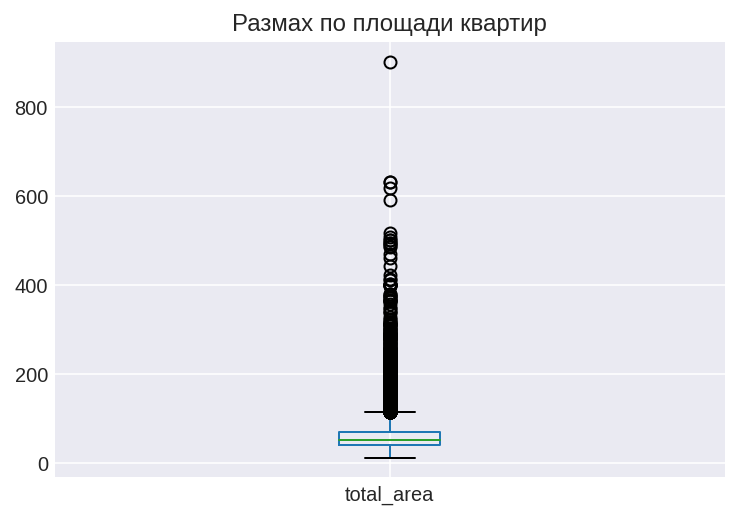

In [60]:
data.boxplot('total_area').set_title('Размах по площади квартир')
plt.show()

Выбросы начинают встречаться, если площадь больше 115 метров, но так как зачастую в современном жилом фонде трёхкомнатные квартиры  могут быть больше 115 м, то возьмём значение чуть выше и будем рассматривать квартиры с площадью до 130 квадратных метров. Выведем гистограмму:

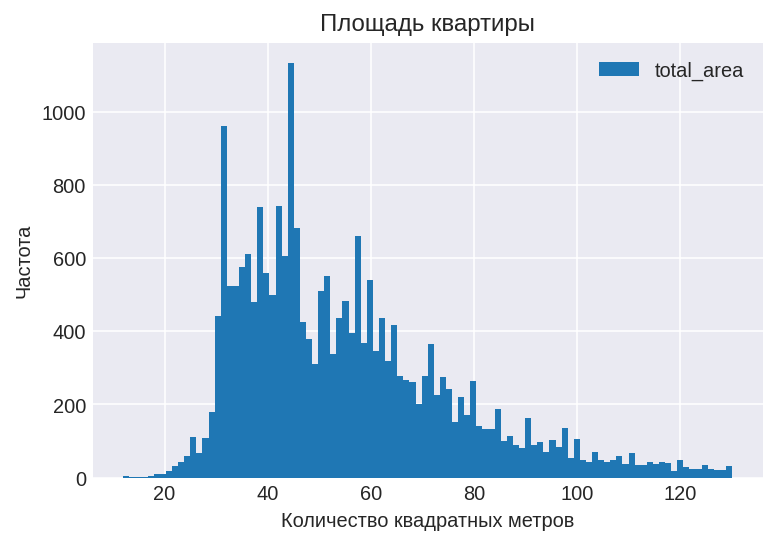

In [61]:
data.query('total_area <= 130').plot(kind='hist', y='total_area', title='Площадь квартиры', bins=100, grid=True)
plt.xlabel("Количество квадратных метров")
plt.ylabel("Частота")
plt.show()

Квартиры с площадью до 20 кв. метров встречаются очень редко и их можно отнести к выбросам. Больше всего объявлений с квартирами от 30 до 70 кв. метров. Пик на графике относиться к квартирам c площадью 45 квадратных метров.

**Цена**

Методом describe() рассмотрим цены квартир:

In [62]:
data['last_price'].describe().apply("{0:.0f}".format)

count        23505
mean       6516232
std       10867371
min          12190
25%        3400000
50%        4620000
75%        6750000
max      763000000
Name: last_price, dtype: object

Размах цен очень значительный, максимальная стоимость квартиры 763 миллиона, а минимальная 12 тысяч, но скорее всего не были поставлены нули и такое значение ошибочное. Половина квартир имеют стоимость от 3,4 до 6,75 миллионов.

Построим boxplot:

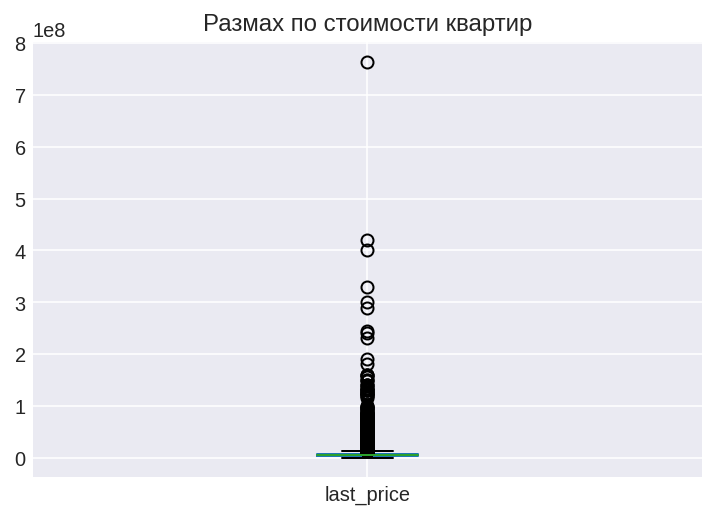

In [63]:
data.boxplot('last_price').set_title('Размах по стоимости квартир')
plt.show()

На таком графике не видно где начинаются выбросы, поэтому добавим предел по оси ординат 50 миллионов:

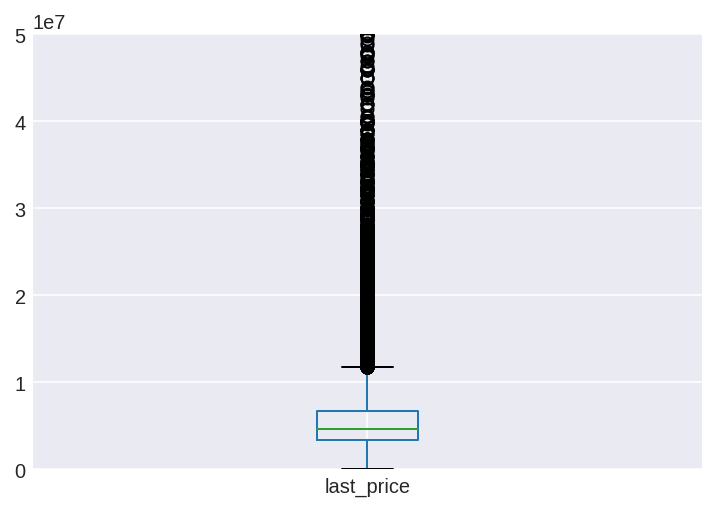

In [64]:
data.boxplot('last_price')
plt.ylim(0, 5e7)
plt.show()

На графике видна очень высокая плотность кружков примерно до 40 миллионов, затем концентрация постепенно падает, поэтому выбросами будем считать цены выше 40 млн. Слишком маленьких значений на графике не видно, вероятно цена в размере 12 тысяч была единичным случаем. Отсортируем таблицу по столбцу с ценой и проверим:

In [65]:
data.sort_values(by='last_price').head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,percentage_kitchen_area,price_square_meter,weekday_exposition_id,month_exposition_id,year_exposition_id,floor_group,percentage_living_area
8730,7,12190,109.0,2019-03-20,2,2.75,25,32.00,25,False,...,0,NaN,8.0,37.16,111,2,3,2019,последний,29.36
17320,7,430000,30.4,2019-04-22,1,2.64,2,16.00,1,False,...,0,NaN,NaN,19.74,14144,0,4,2019,первый,52.63
14793,5,430000,54.0,2018-06-26,2,2.64,3,44.69,3,False,...,0,NaN,44.0,17.24,7962,1,6,2018,последний,82.76
16147,18,440000,40.0,2018-07-10,1,2.64,5,33.10,1,False,...,0,NaN,45.0,17.25,11000,1,7,2018,первый,82.75
17538,0,450000,36.5,2018-02-01,1,2.64,5,17.30,4,False,...,0,NaN,120.0,23.29,12328,3,2,2018,другой,47.40
5653,7,450000,42.0,2017-07-31,2,2.64,1,23.00,1,False,...,0,NaN,233.0,13.81,10714,0,7,2017,первый,54.76
16093,14,450000,38.5,2018-07-11,2,2.65,2,31.86,1,False,...,0,NaN,45.0,17.25,11688,2,7,2018,первый,82.75
9514,7,450000,43.4,2018-08-31,2,2.64,5,30.30,3,False,...,0,NaN,96.0,12.67,10368,4,8,2018,другой,69.82
21730,0,470000,37.0,2018-02-18,1,2.64,3,30.62,3,False,...,0,NaN,45.0,17.24,12702,6,2,2018,последний,82.76
23292,11,470000,44.5,2018-07-02,2,2.64,2,28.00,2,False,...,0,NaN,298.0,16.85,10561,0,7,2018,последний,62.92


Можно утверждать, что цена указана с ошибкой, так как эта запись относится к двухкомнатной квартире c площадью  109 метров. Далее стоимость квартир начинается от 430 тысяч, что тоже не совсем похоже на стоимость жилья, но возможно такие цены относятся к техническим помещениям или к дому в посёлке, поэтому такие строчки исключать не будем. Построим гистограмму без учета выбросов:

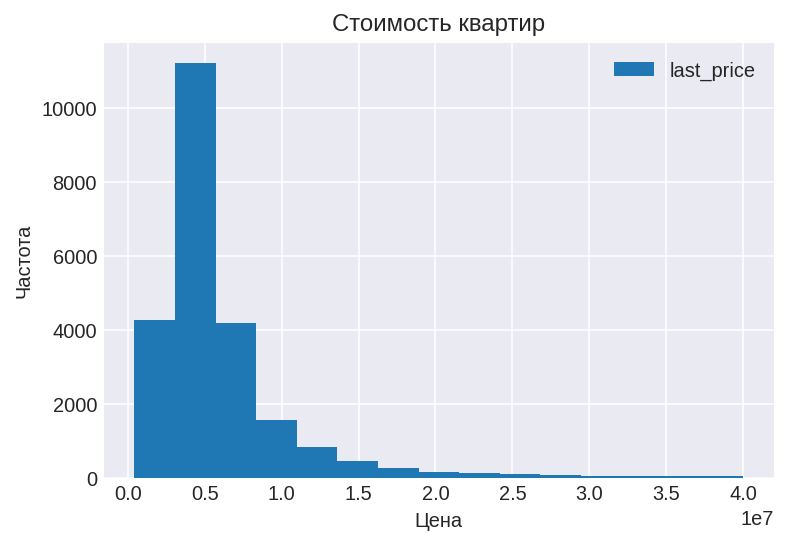

In [66]:
data.query('430000 < last_price <= 4e7').plot(kind='hist', y='last_price', title='Стоимость квартир', bins=15, grid=True)
plt.xlabel("Цена")
plt.ylabel("Частота")
plt.show()

Большинство квартир находится в диапазоне с ценами от 3,5 до 6 миллионов.

**Количество комнат**

Вызовем метод describe() и рассмотрим число комнат:

In [67]:
data['rooms'].describe().apply("{0:.0f}".format)

count    23505
mean         2
std          1
min          0
25%          1
50%          2
75%          3
max         19
Name: rooms, dtype: object

В основном продают квартиры, имеющие от 1 и до 3 комнат. Построим boxplot и гистограмму:

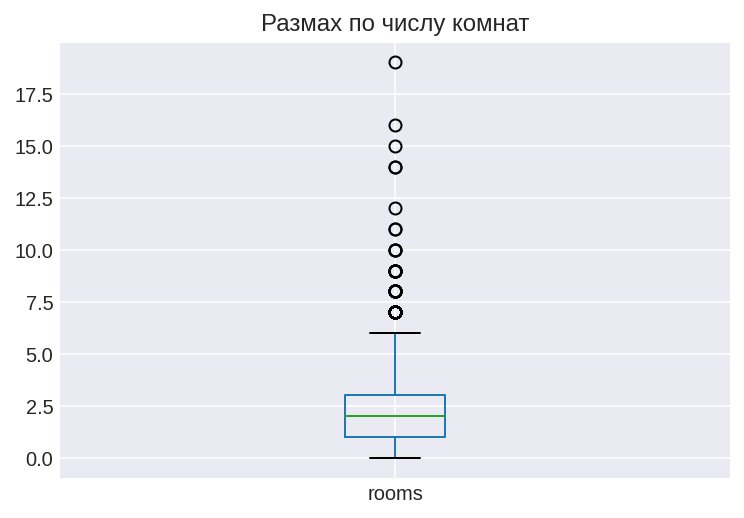

In [68]:
data.boxplot('rooms').set_title('Размах по числу комнат')
plt.show()

Редко встречаются значения с количеством комнат больше 6, построим график без выбросов:

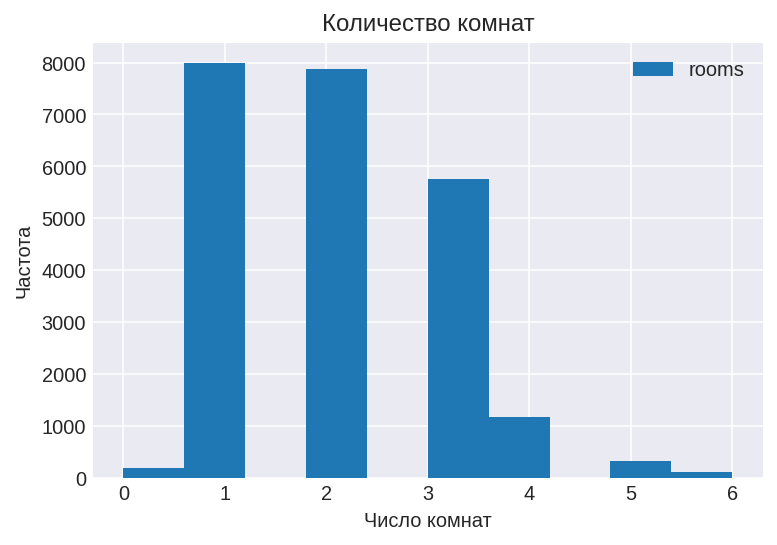

In [69]:
data.query('rooms <= 6').plot(kind='hist', y='rooms', title='Количество комнат', bins=10, grid=True)
plt.xlabel("Число комнат")
plt.ylabel("Частота")
plt.show()

Большинство квартир однакомнатные и двухкомнатные. Ноль комнат может быть у аппартаментов или технических помещений, таких продаж так же мало, как и 6 комнат.

**Высота потолков**

Вызовем метод describe():

In [70]:
data['ceiling_height'].describe().apply("{0:.2f}".format)

count    23505.00
mean         2.73
std          0.99
min          1.00
25%          2.60
50%          2.64
75%          2.72
max        100.00
Name: ceiling_height, dtype: object

В основном высота потолков в квартирах от 2,6 и до 2,72 метров. Минимальное значение 1 метр возможно относится к техническим помещениям, а максимум в 100 метров скорее всего ошибочное. Построим boxplot, на графике рассмотрим частоту встречаемости потолков до 10 метров:

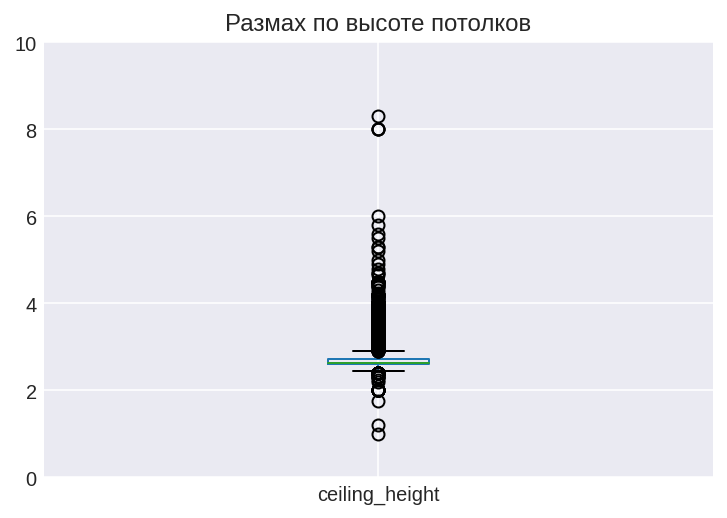

In [71]:
data.boxplot('ceiling_height').set_title('Размах по высоте потолков')
plt.ylim(0, 10)
plt.show()

Высокие потолки встречаются не так редко, но больше 4 метров это единичные случаи. Построим гистограмму со значениями чуть выше "усов" боксплота, чтобы не исключить квартиры в центре Санкт-Петербурга, у которых потолки в среднем 3,1 метров. Возьмём верхнюю границу 3,5 метра и отбросим нижние выбросы, с высотой потолков меньше 2,5 метров:

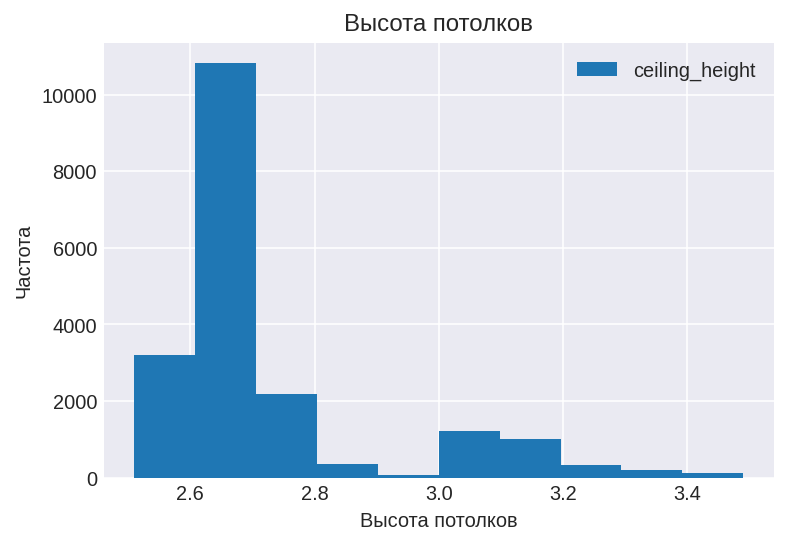

In [72]:
data.query('2.5 < ceiling_height < 3.5').plot(kind='hist', y='ceiling_height', title='Высота потолков', bins=10, grid=True)
plt.xlabel("Высота потолков")
plt.ylabel("Частота")
plt.show()

На графике сильно выделяются квартиры с потолками от 2,6 до 2,7 метров. Объявления с потолками от 2,8 и до 3 метров встречаются очень редко, так как это не стандартный размер потолков, а потолки от 3 до 3,2 метров вероятнее всего принадлежат квартирам в центре Санкт-Петербурга.

**Оценка времени продажи**

Вызовем метод describe() и посмотрим сроки, которые понадобились для завершения сделок:

In [73]:
data['days_exposition'].describe().apply("{0:.0f}".format)

count    20369
mean       181
std        220
min          1
25%         45
50%         95
75%        231
max       1580
Name: days_exposition, dtype: object

Медиана по продажам квартир состоявляет 95 дней, среднее значение в два раза больше из-за существенных выбросов. Есть квартиры, которые продаются необычно быстро, всего за 1 день и есть квартиры, которые продаются более 4 лет.

Построим boxplot:

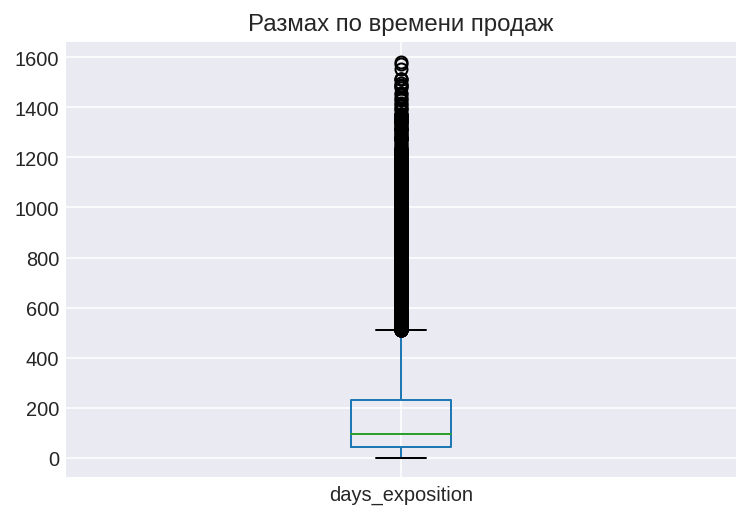

In [74]:
data.boxplot('days_exposition').set_title('Размах по времени продаж')
plt.show()

Редко квартиры продаются больше чем за 500 дней, выведем гистограмму без выбросов:

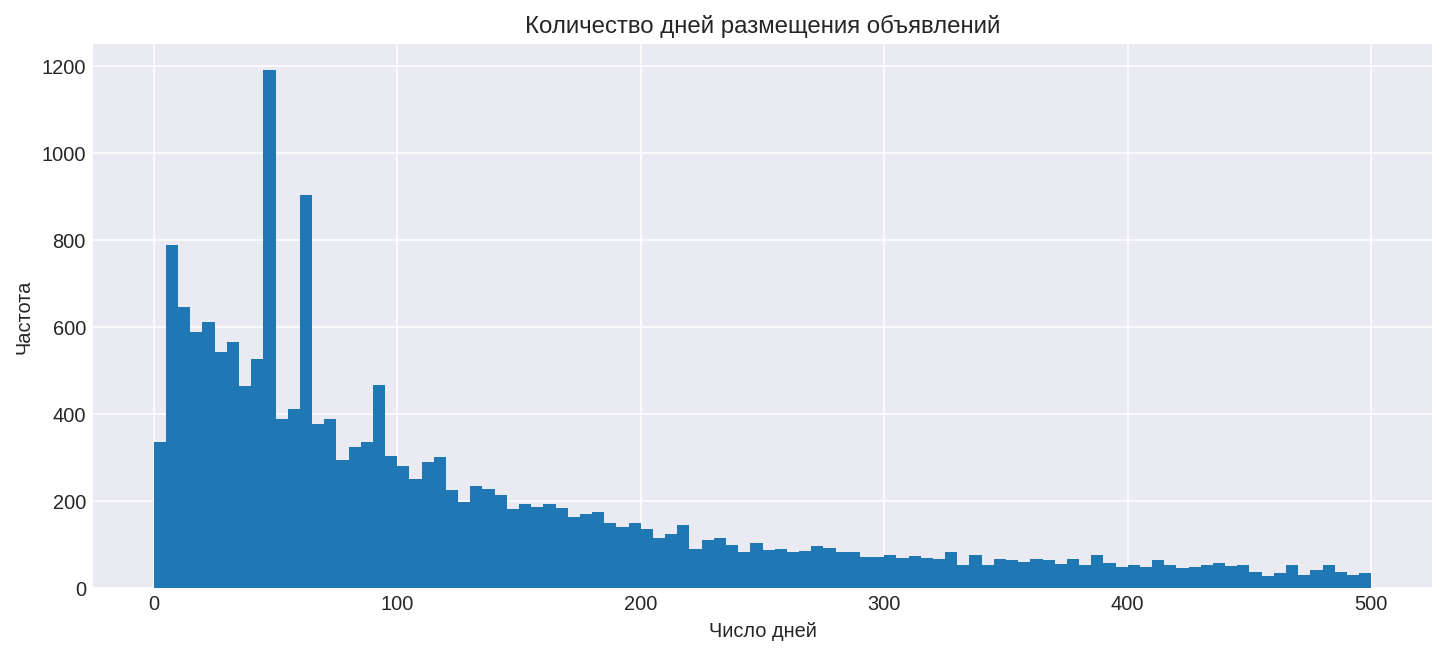

In [75]:
data['days_exposition'].plot(
    kind='hist',
    y='days_exposition',
    title='Количество дней размещения объявлений',
    range=(0,500),
    bins=100,
    grid=True,
    figsize=(12,5)
)
plt.xlabel("Число дней")
plt.ylabel("Частота")
plt.show()

Большинство квартир продаются в первые три месяца, выделяется пик где-то на 50 день. Построим график от 0 до 100 дней, чтобы точнее определить срок продаж:

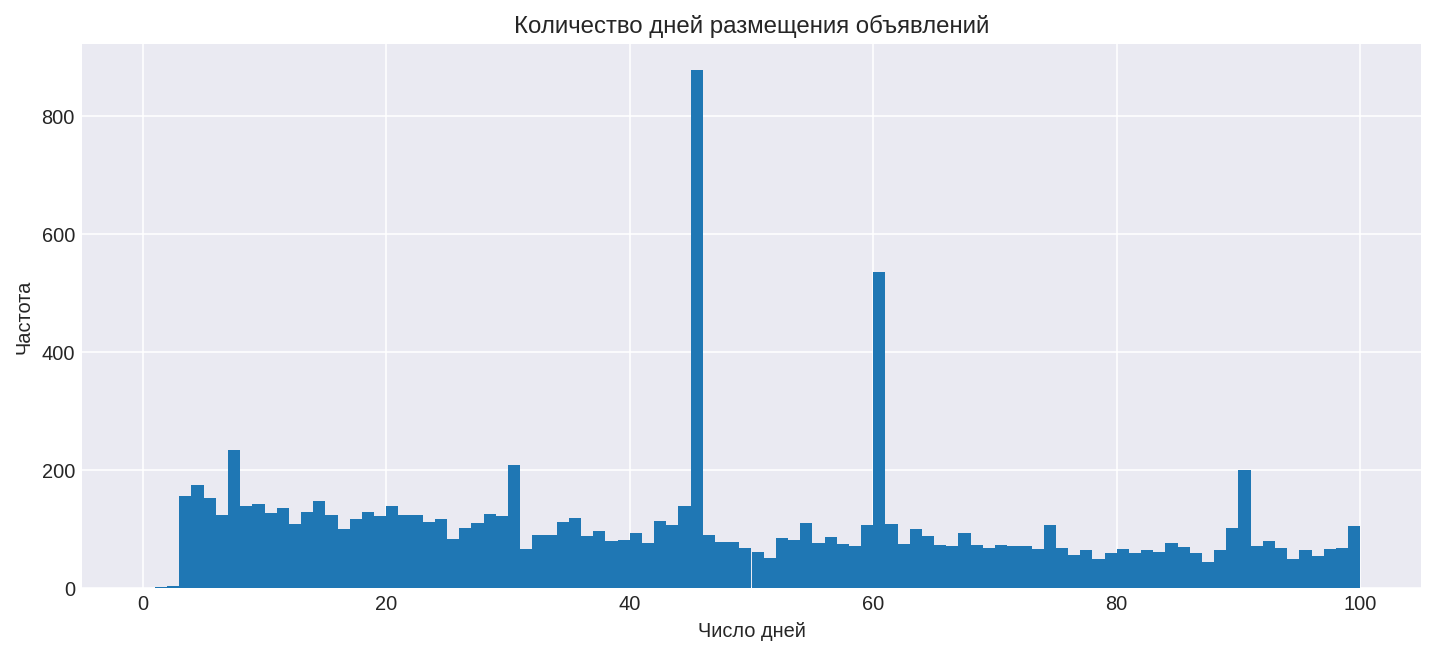

In [76]:
data['days_exposition'].plot(
    kind='hist',
    y='days_exposition',
    title='Количество дней размещения объявлений',
    range=(0,100),
    bins=100,
    grid=True,
    figsize=(12,5),
)
plt.xlabel("Число дней")
plt.ylabel("Частота")
plt.show()

Максимальное количество сделок приходится на 45 день, также выделяется пик 60 дней.

Сделаем срез таблицы, убрав редкие и выбивающиеся значения:

In [77]:
data_filter = data.query('12 < total_area <= 130 and 430000 < last_price <= 4e7 and rooms <= 6 and 2.5 < ceiling_height < 3.5 and days_exposition <= 500').reset_index(drop=True)
data_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15198 entries, 0 to 15197
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             15198 non-null  int64         
 1   last_price               15198 non-null  int64         
 2   total_area               15198 non-null  float64       
 3   first_day_exposition     15198 non-null  datetime64[ns]
 4   rooms                    15198 non-null  int64         
 5   ceiling_height           15198 non-null  float64       
 6   floors_total             15198 non-null  int64         
 7   living_area              15198 non-null  float64       
 8   floor                    15198 non-null  int64         
 9   is_apartment             15198 non-null  bool          
 10  studio                   15198 non-null  bool          
 11  open_plan                15198 non-null  bool          
 12  kitchen_area             15198 n

В отфильтрованной таблице осталось всего 15198 строк, это 64,7% от основной таблицы.

    
Проверим результат среза:

In [78]:
data_filter[['last_price', 'total_area','rooms', 'ceiling_height' ]].describe().loc[['min', 'max']]

,last_price,total_area,rooms,ceiling_height
min,440000.0,13.0,0.0,2.51
max,40000000.0,130.0,6.0,3.49


<div style="border: solid green 2px; padding: 20px">

**Выводы**
    
* В таблице были изучены площадь, цена, число комнат и высота потолков. Чаще всего публикуются квартиры с площадью 45 кв. метров, по цене от 3,5 до 6 миллионов, имеющих 1 или 2 комнаты и с высотой потолков от 2,6 до 2,72 метров. 
* Рассмотрели время продаж и определили, что многие квартиры продаются в срок за 95 дней, с максимальной частотой завершения сделок на 45 день. 
* Рассмотрели выбросы и в результате создали новую отфильтрованную таблицу без учёта выбивающихся значений.</div>

<a name="3.2"><h3>3.2 Факторы, влияющие на стоимость квартиры</h3></a>

Напишем функцию для оценки влияния различных факторов на цену, которая создает сводную таблицу, переименовывает колонки и сортирует по столбцу 'median'. Так как среднее значение неустойчиво к выбросам, то будем рассматривать медиану.

In [79]:
def func_pivot_table(table, name):
    table = table.pivot_table(index=name, values='last_price', aggfunc=['count','median','min','max'])
    table = table.set_axis(['count','median','min','max'], axis='columns', inplace=False)
    return table.sort_values(by='median', ascending=False)

Также для оценки корреляции создадим функцию, возвращающую  процент корреляции и график:

In [80]:
def func_plot(table, name, title_name, column_for_corr):
    table_plot = table.pivot_table(index=name, values='last_price', aggfunc='median').plot(title=title_name, grid=True);
    plt.ylabel('median price')
    print("Процент корреляции: ", round(table['last_price'].corr(table[column_for_corr]),3))
    return table_plot

**Площадь квартиры**

Для рассмотрения зависимости цены от количества квадратных метров, поделим общую площадь на 5 категорий и добавим новый столбец в таблицу 'data_filter':

In [81]:
data_filter['total_area_group'] = pd.qcut(data_filter['total_area'], q=5)

Выведем сводную таблицу:

In [82]:
func_pivot_table(data_filter, 'total_area_group')

,count,median,min,max
total_area_group,,,,
"(71.2, 130.0]",3039,8370000,850000,40000000
"(56.3, 71.2]",3032,5660000,730000,23000000
"(45.0, 56.3]",2890,4550000,500000,17860000
"(37.0, 45.0]",3148,3940000,440000,24412900
"(12.999, 37.0]",3089,3190000,450000,12000000


Построим график и рассчитаем процент корреляции:

Процент корреляции:  0.722


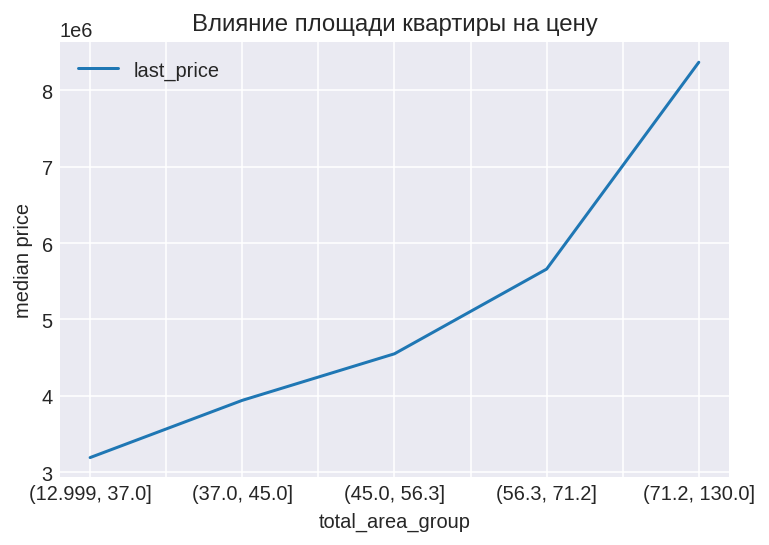

In [83]:
func_plot(data_filter, 'total_area_group', 'Влияние площади квартиры на цену', 'total_area');

С увеличением площади возрастает и стоимость квартир, процент корреляции 0,72% означает, что связь чуть выше средней.

**Количество комнат**

Построим сводную таблицу и рассмотрим зависимость цены от числа комнат:

In [84]:
func_pivot_table(data_filter, 'rooms')

,count,median,min,max
rooms,,,,
6,7,11700000,9000000,16550000
5,66,9500000,1750000,25000000
4,520,7700000,999000,39900000
3,3443,6300000,550000,40000000
2,5245,4890000,450000,39744000
1,5751,3650000,440000,36000000
0,166,2700000,945750,7400000


По медиане можно сказать, что чем больше комнат, тем выше цена. Но если смотреть максимум, то однокомнатные квартиры могут иметь такую же высокую цену, как и квартиры с большим количеством комнат. Построим график с зависимостью и рассчитаем корреляцию:

Процент корреляции:  0.445


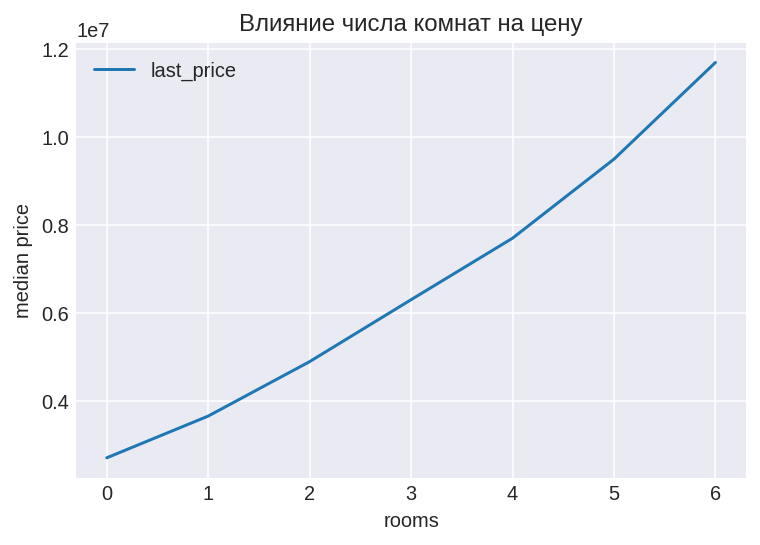

In [85]:
func_plot(data_filter, 'rooms', 'Влияние числа комнат на цену', 'rooms');

На графике видна связь между ценой и количеством комнат, но корреляция 0.45% говорит о том, что связь не сильная. Значит увеличение цены есть, но далеко не для всех квартир, так как иногда однакомнатная может стоить дороже, чем квартира с большим числом комнат.

**Этаж квартиры**

Построим сводную таблицу и рассмотрим зависимость цены от этажа:

In [86]:
func_pivot_table(data_filter, 'floor_group')

,count,median,min,max
floor_group,,,,
другой,11516,4700000,450000,40000000
последний,1939,4250000,470000,39900000
первый,1743,3800000,440000,31500000


Самая большая цена в категории 'другой' и самая низкая в категории 'первый'. При этом у последнего этажа самая высокая минимальная цена. Вызовем функцию 'func_plot' и посмотрим на график:

Процент корреляции:  0.068


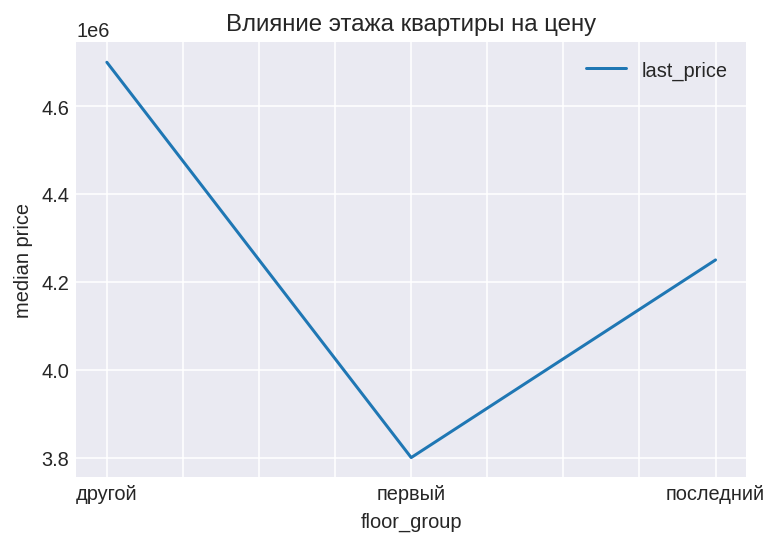

In [87]:
func_plot(data_filter, 'floor_group', 'Влияние этажа квартиры на цену', 'floor');

Если сравнивать первый и последний этаж, то последний предпочтительнее. Линейная связь отсутствует.

<div style="border: solid green 2px; padding: 20px">

**Выводы**
    
По параметрам квартир определили:
* Площадь влияет на стоимость квартир, также есть связь с количеством комнат, но менее сильная.
* Для квартир на первом этаже цена ниже.</div>

<a name="3.3"><h3>3.3 Влияние даты публикации</h3></a>

**День недели публикации**

Выведем сводную таблицу для оценки зависимости с днём пубикации и заменим цифровые обозначения дней на названия с помощью словаря dict_weekday:

In [88]:
weekday_pivot = func_pivot_table(data_filter, 'weekday_exposition_id')
weekday_pivot.reset_index().replace({'weekday_exposition_id': dict_weekday.weekday_exposition.to_dict()})

,weekday_exposition_id,count,median,min,max
0,Tuesday,2687,4600000,440000,40000000
1,Thursday,2754,4562500,450000,39000000
2,Monday,2218,4500000,450000,31750000
3,Wednesday,2500,4500000,450000,39900000
4,Friday,2686,4500000,450000,34000000
5,Saturday,1241,4500000,550000,37000000
6,Sunday,1112,4450000,470000,37272000


В таблице самая высокая средняя цена в четверг и наиболее низкая в воскресенье, но при этом цены отличаются незначительно. Посмотрим график:

Процент корреляции:  -0.008


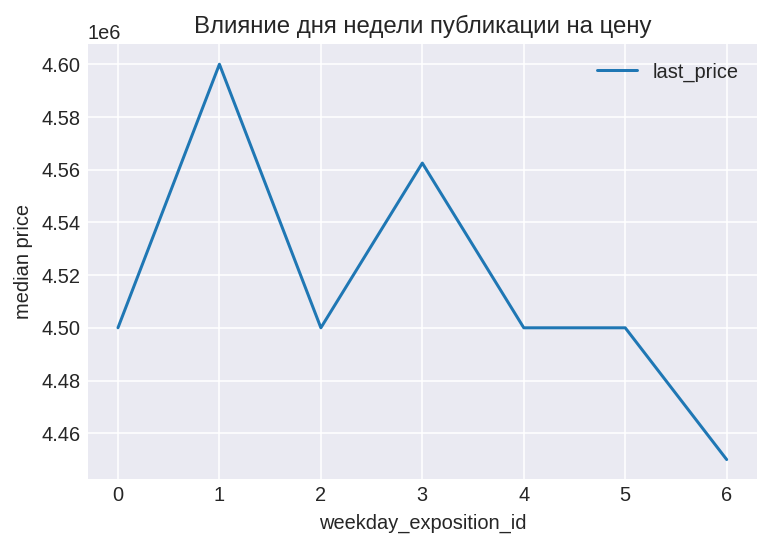

In [89]:
func_plot(data_filter, 'weekday_exposition_id', 'Влияние дня недели публикации на цену', 'weekday_exposition_id');

На графике выделяется пик в четверг и наблюдается спад по цене в воскресенье, но можно сказать, что связь отсутствует и носит случайный характер. Корреляция близка к нулю.

**Месяц публикации**

Выводим сводную таблицу для оценки зависимости месяца публикации и цены и заменяем цифровые обозначения месяца на названия с помощью словаря dict_month:

In [90]:
month_pivot = func_pivot_table(data_filter, 'month_exposition_id')
month_pivot.reset_index().replace({'month_exposition_id': dict_month.month_exposition.to_dict()})

,month_exposition_id,count,median,min,max
0,September,1379,4650000,520000,39744000
1,November,1619,4650000,560000,37000000
2,February,1693,4600000,450000,40000000
3,April,1131,4595000,550000,35000000
4,August,1231,4550000,450000,39000000
5,January,966,4545000,480000,36000000
6,October,1438,4511000,600000,27600000
7,March,1377,4500000,600000,27000000
8,July,1168,4500000,440000,30000000
9,December,1062,4500000,490000,39900000


По сводной таблице не видно, есть ли связь по сезонам, практически одинаково высокая цена с августа по февраль и в апреле. Самая низкая стоимость в июне. 

Посмотрим график:

Процент корреляции:  -0.003


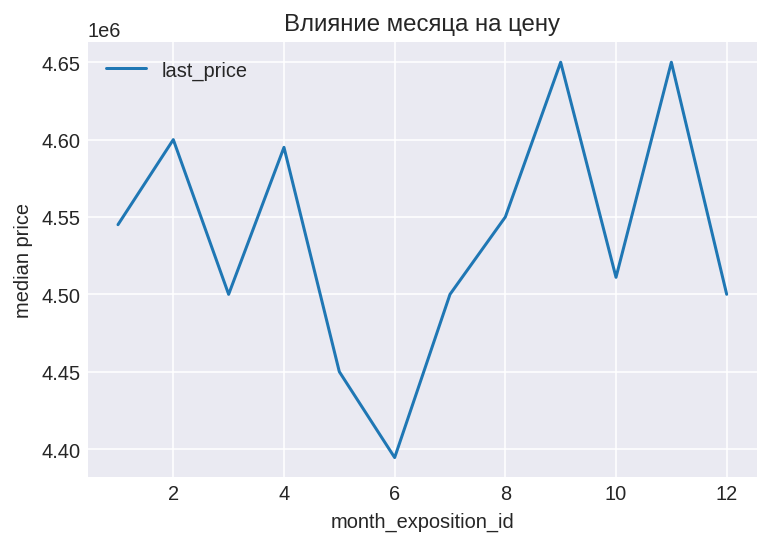

In [91]:
func_plot(data_filter, 'month_exposition_id', 'Влияние месяца на цену', 'month_exposition_id');

Взаимосвязи между месяцем публикации и ценой нет, корреляция равна нулю.

**Год публикации**

Создаём сводную таблицу по годам публикации:

In [92]:
func_pivot_table(data_filter, 'year_exposition_id')

,count,median,min,max
year_exposition_id,,,,
2019,790,5000000,480000,25000000
2015,387,4700000,650000,25398000
2018,5856,4597000,440000,39744000
2017,6380,4490000,450000,40000000
2016,1785,4450000,580000,37272000


Самая высокая цена в 2019 году, затем по стоимости идёт 2015 год, но выборка в этих группах значительно меньше, чем в 2016-2018 годах. Посмотрим график:

Процент корреляции:  0.007


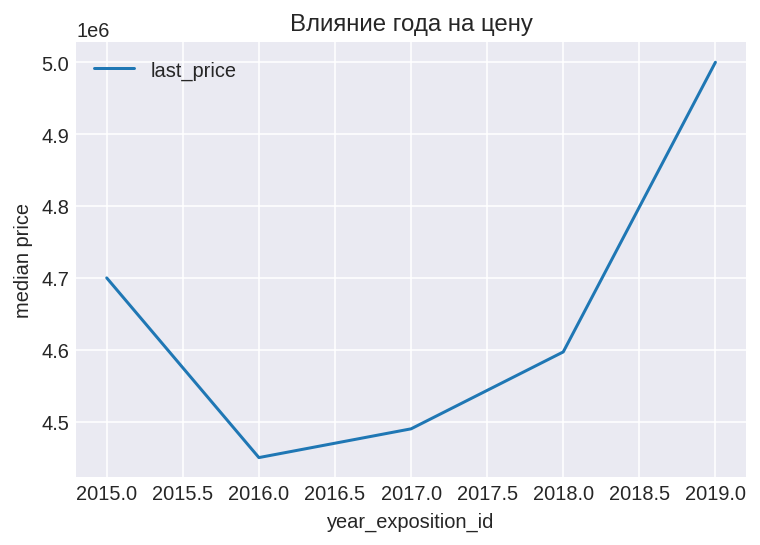

In [93]:
func_plot(data_filter, 'year_exposition_id', 'Влияние года на цену', 'year_exposition_id');

В 2015 году цены были выше, чем в 2016, но после 2016 года стоимость на квартиры растёт. Можно сказать что связь есть, но она нелинейная.

<div style="border: solid green 2px; padding: 20px">

**Вывод**
    
* Связи между ценой и днём недели и месяцем публикации не обнаружено.
* Начиная с 2016 года стоимость на квартиры растет.</div>

<a name="3.4"><h3>3.4 Оценка населённых пунктов по числу объявлений</h3></a>

Выберем 10 населённых пунктов с наибольшим количеством объявлений и рассчитаем среднюю цену квадратного метра:

In [94]:
pivot_locality_name = data_filter.pivot_table(index='locality_name', values='price_square_meter', aggfunc=['count', 'median'])
pivot_locality_name.columns = ['count', 'median']
pivot_locality_name.sort_values('count', ascending=False).head(10)

,count,median
locality_name,,
санкт-петербург,10022,103615.5
мурино,503,86272.0
кудрово,399,94758.0
шушары,359,75757.0
всеволожск,279,65789.0
парголово,274,91472.0
колпино,205,74137.0
пушкин,204,99865.5
гатчина,188,67417.0


<div style="border: solid green 2px; padding: 20px">

**Вывод**
    
Существенно больше объявлений в Санкт-Петербурге, медиана цены за квадратный метр здесь тоже выше, чем в области. Далее по цене идут Пушкино, Кудрово и Парголово. Mеньше всего объявлений в Выборге и цена здесь тоже самая низкая.</div>

<a name="3.5"><h3>3.5 Исследование зависимости цены и удаленности от центра</h3></a>

Рассмотрим предложения в Санкт-Петербурге и в Ленинградской области по отдельности в зависимости от цены квадратного метра и удаленности от центра города.

Для этого добавим в таблицу столбец 'locality_is_spb' типа bool. Eсли квартира расположена в Санкт-Петербурге, то True, иначе False.

In [95]:
data_filter['locality_is_spb'] = data_filter['locality_name'] == 'санкт-петербург'

Для расчета средней цены за каждый километр, сoздадим колонку с пустыми значениями:

In [96]:
data_filter['price_per_kilometer'] = np.nan

Для каждого километра в столбце 'city_centers_nearest' и для True или False в столбце 'locality_is_spb' считаем медиану цены за квадратный метр в каждой категории, затем фильтруем по этим же параметрам и присваиваем рассчитанную медиану:

In [97]:
for km in data_filter['city_centers_nearest'].unique():
    for locality in data_filter['locality_is_spb'].unique():
        median = data_filter.loc[(data_filter['city_centers_nearest'] == km) 
                                 & (data_filter['locality_is_spb'] == locality), 'price_square_meter'].median()
        data_filter.loc[(data_filter['city_centers_nearest'] == km) 
                        & (data_filter['locality_is_spb'] == locality), 'price_per_kilometer'] = median

Проверим, что в столбце 'price_per_kilometer' нет пропусков:

In [98]:
data_filter['price_per_kilometer'].isna().sum()

0

Выделим две таблицы для Санкт-Петербурга и области:

In [99]:
data_filter_spb = data_filter.query('locality_is_spb == True')
data_filter_region = data_filter.query('locality_is_spb == False')

Построим линейный график и диаграмму рассеяния с зависимостью цены квадратного метра от удаленности от центра Санкт-Петербурга и рассчитаем корреляцию:

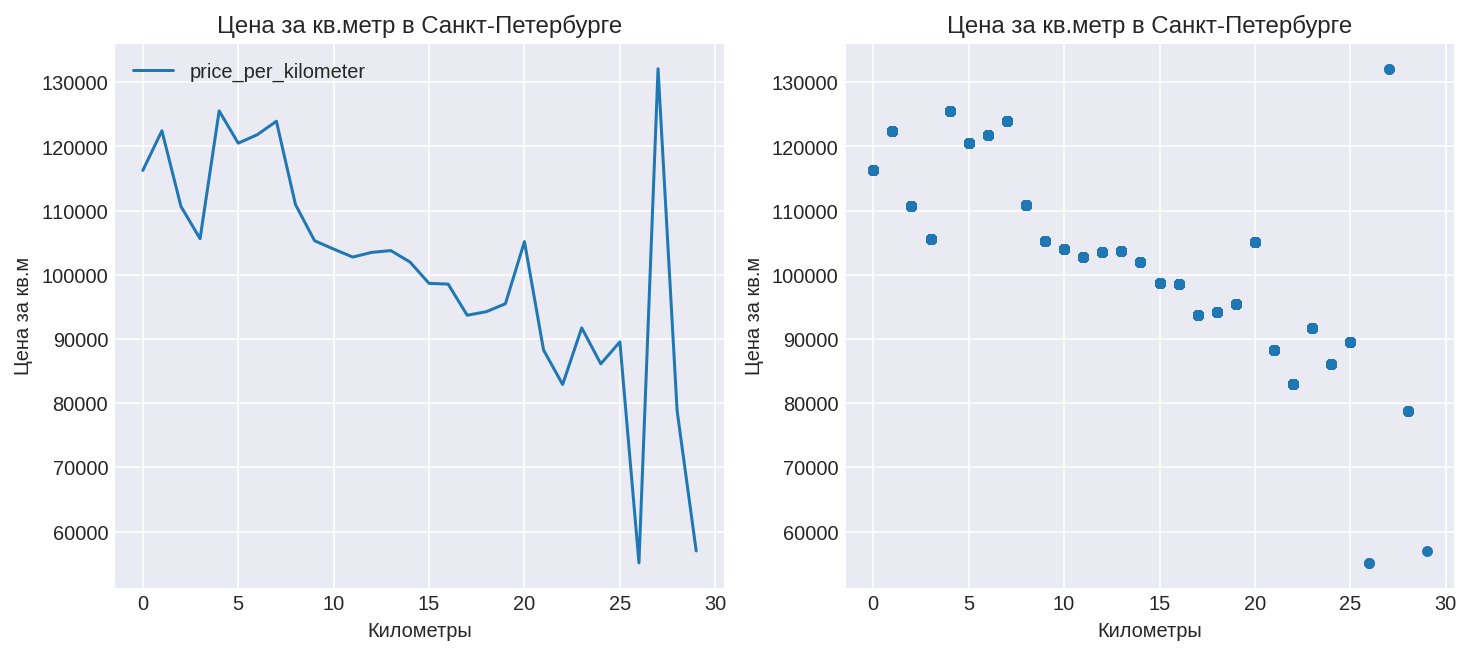

Корреляция:  -0.859


In [100]:
figure, ax = plt.subplots(1,2,figsize=(12,5))

data_filter_spb.pivot_table(index='city_centers_nearest', values='price_per_kilometer', aggfunc='median').plot(grid=True, ax=ax[0])

ax[0].set_title('Цена за кв.метр в Санкт-Петербурге')
ax[0].set_xlabel('Километры')
ax[0].set_ylabel('Цена за кв.м')

data_filter_spb.plot(x='city_centers_nearest', y='price_per_kilometer', kind='scatter', grid=True, ax=ax[1])

ax[1].set_title('Цена за кв.метр в Санкт-Петербурге')
ax[1].set_xlabel('Километры')
ax[1].set_ylabel('Цена за кв.м')                

plt.show()

print('Корреляция: ', round(data_filter_spb['price_per_kilometer'].corr(data_filter_spb['city_centers_nearest']),3))

Получилась отрицательная корреляция с высокой связью, при удаленности от центра цена уменьшается, но не всегда. Так например, при удаленности на 4 и 7 км цена выше, чем в самом центре, вероятно там расположены квартиры с большей площадью или с хорошим видом. Также на графике выделяется повышение цены при удаленности на 20 километров и самая высокая цена при удаленности на 27,5 км. Возможно в этом месте расположены благоприятные или новые микрорайоны в области Санкт-Петербурга.

Рассмотрим графики с зависимостью цены квадратного метра от удаленности от центра города в Ленинградской области:

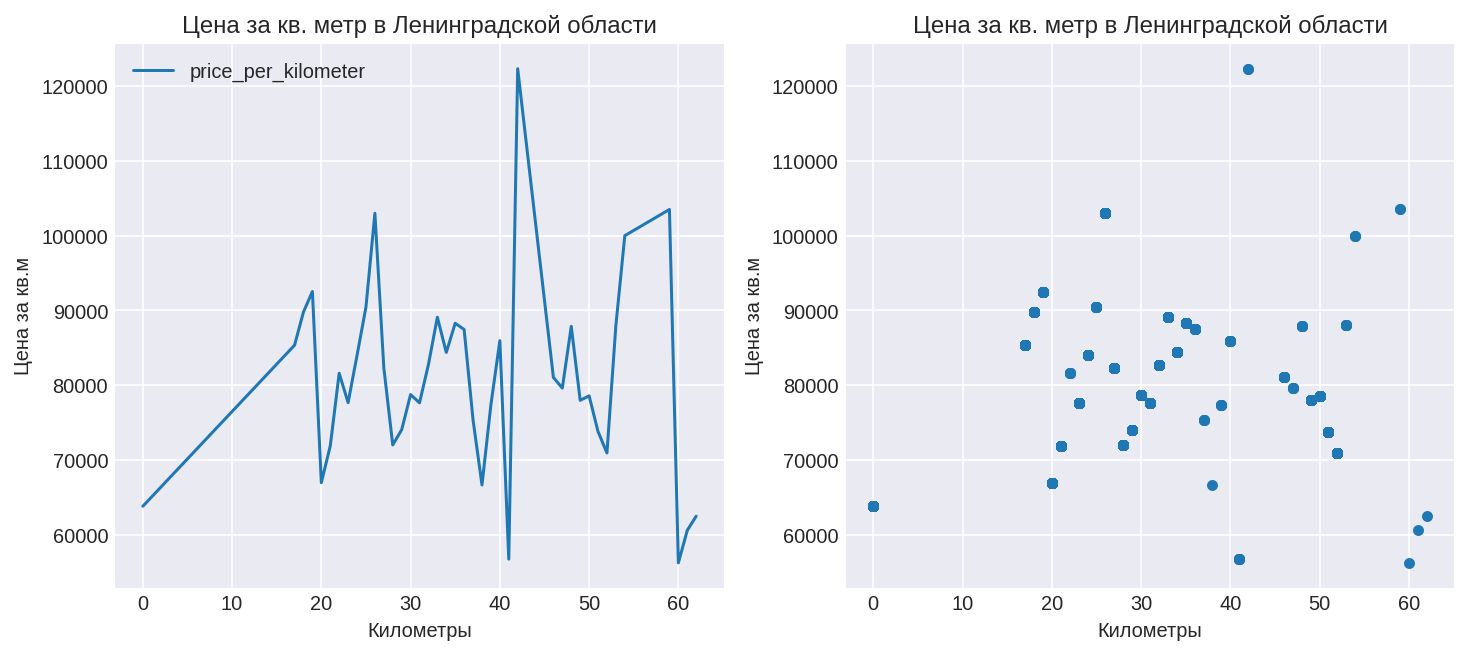

Корреляция:  0.785


In [101]:
figure, ax = plt.subplots(1,2,figsize=(12,5))

data_filter_region.pivot_table(index='city_centers_nearest', values='price_per_kilometer', aggfunc='median').plot(grid=True, ax=ax[0])

ax[0].set_title('Цена за кв. метр в Ленинградской области')
ax[0].set_xlabel('Километры')
ax[0].set_ylabel('Цена за кв.м')

data_filter_region.plot(x='city_centers_nearest', y='price_per_kilometer', kind='scatter', grid=True, ax=ax[1])

ax[1].set_title('Цена за кв. метр в Ленинградской области')
ax[1].set_xlabel('Километры')
ax[1].set_ylabel('Цена за кв.м')                

plt.show()

print('Корреляция: ', round(data_filter_region['price_per_kilometer'].corr(data_filter_region['city_centers_nearest']),3))

Выделяется аномально высокая цена на 42 километре. Наиболее низкая цена при удаленности на 41 и 60 км. При этом диаграмма рассеяния показывает широкий разброс значений, вероятнее всего цены связаны с особенностями районов, а не с удалённостью от центра.

<div style="border: solid green 2px; padding: 20px">

**Вывод**

В Санкт Петербурге удаленность от центра влияет на уменьшение цены, корреляция составляет -0.86, что говорит о высокой связи.

Несмотря на корреляцию 0,78 в Ленинградской области, на графиках видно, что связь нелинейная и скорее всего зависит не от удаленности, а от благополучия района.</div>

<a name="3.6"><h3>3.6 Анализ квартир в центре Санкт-Петербурга</h3></a>

Для анализа квартир в центре Санкт-Петербурга выделим область 3 километра и посмотрим общую информацию о таблице:

In [102]:
center_spb = data_filter_spb.query('city_centers_nearest <= 3')
center_spb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 16 to 15136
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             569 non-null    int64         
 1   last_price               569 non-null    int64         
 2   total_area               569 non-null    float64       
 3   first_day_exposition     569 non-null    datetime64[ns]
 4   rooms                    569 non-null    int64         
 5   ceiling_height           569 non-null    float64       
 6   floors_total             569 non-null    int64         
 7   living_area              569 non-null    float64       
 8   floor                    569 non-null    int64         
 9   is_apartment             569 non-null    bool          
 10  studio                   569 non-null    bool          
 11  open_plan                569 non-null    bool          
 12  kitchen_area             569 non-

В таблице осталось 569 записей.

Циклом выведем графики вида hist и boxplot для оценки площади, цены, числа комнат и высоты потолков:

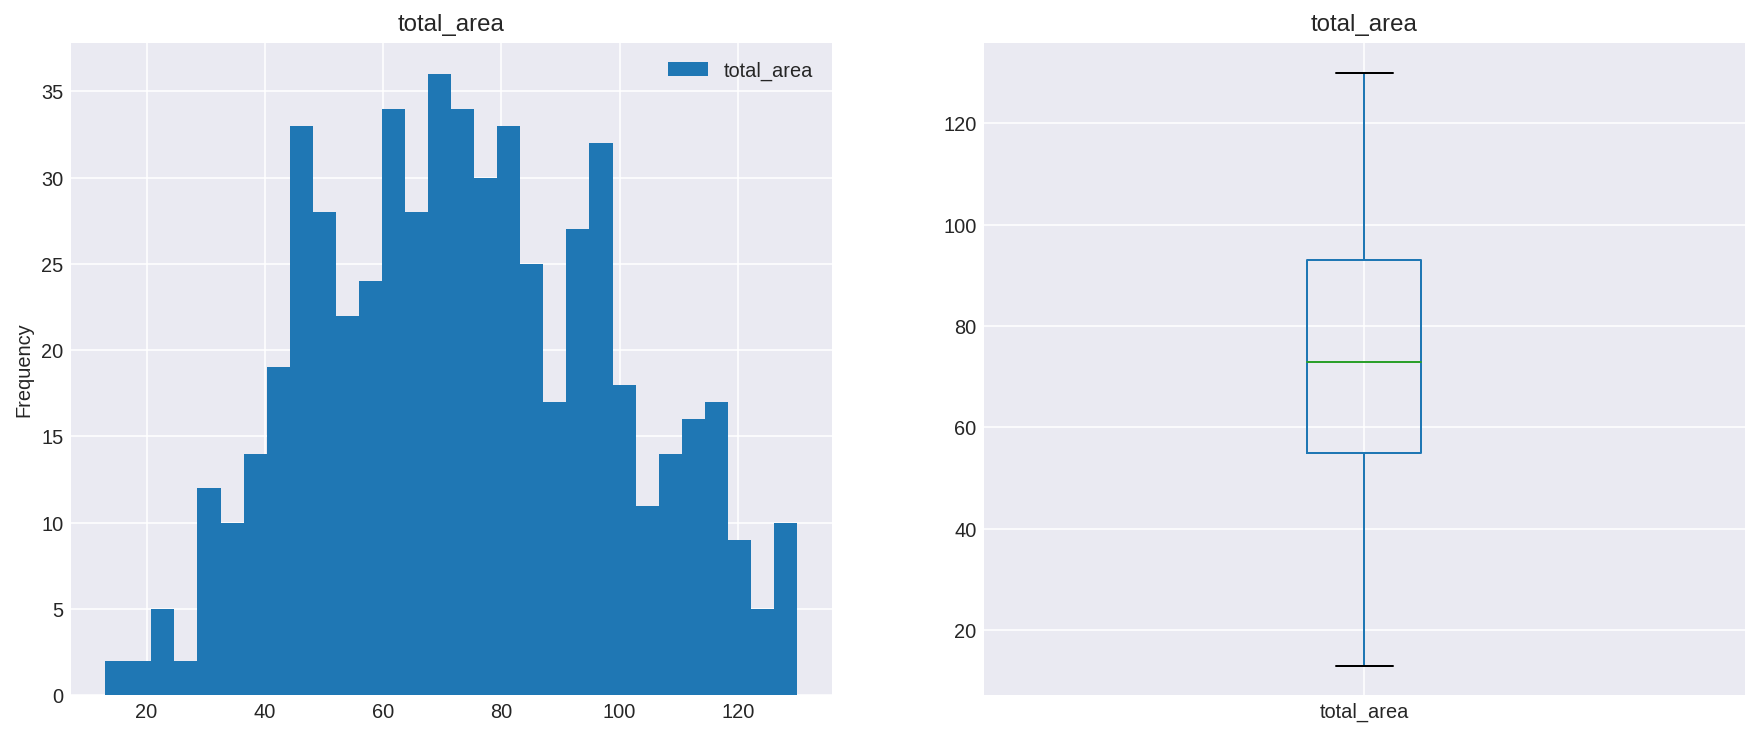

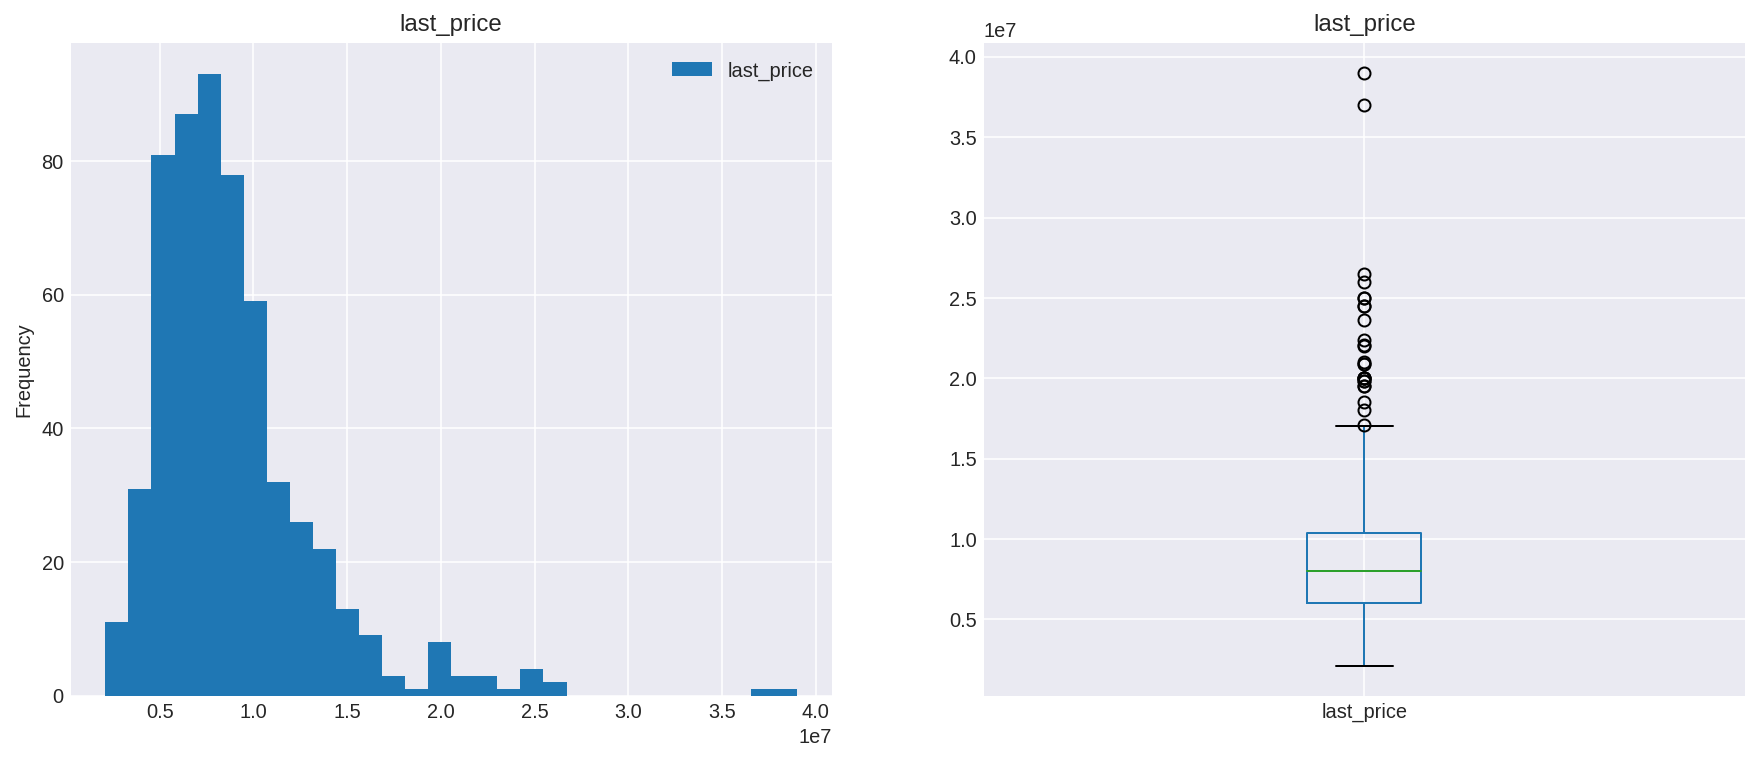

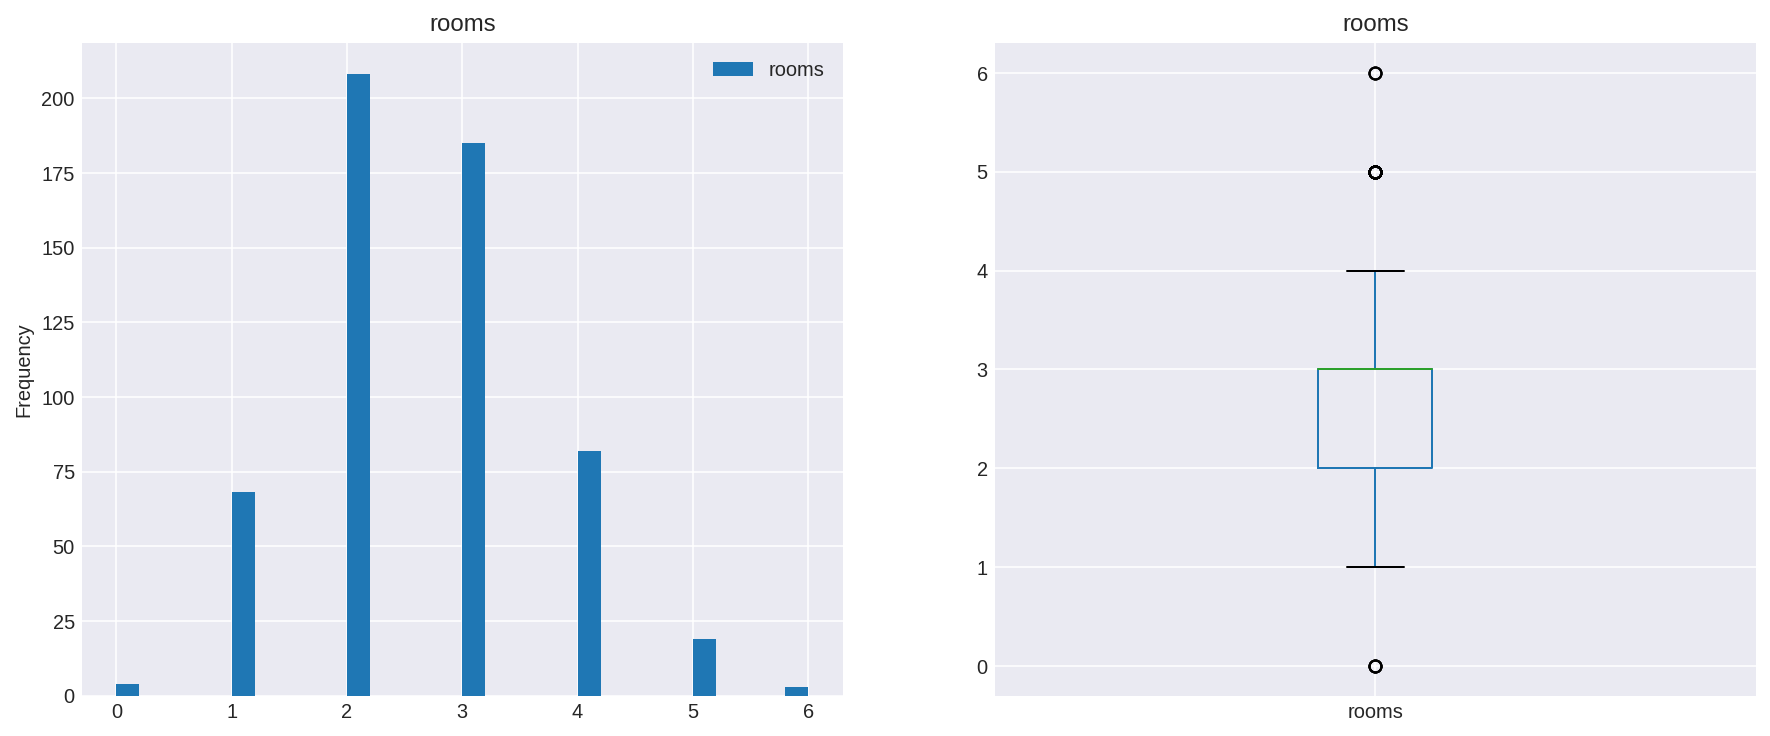

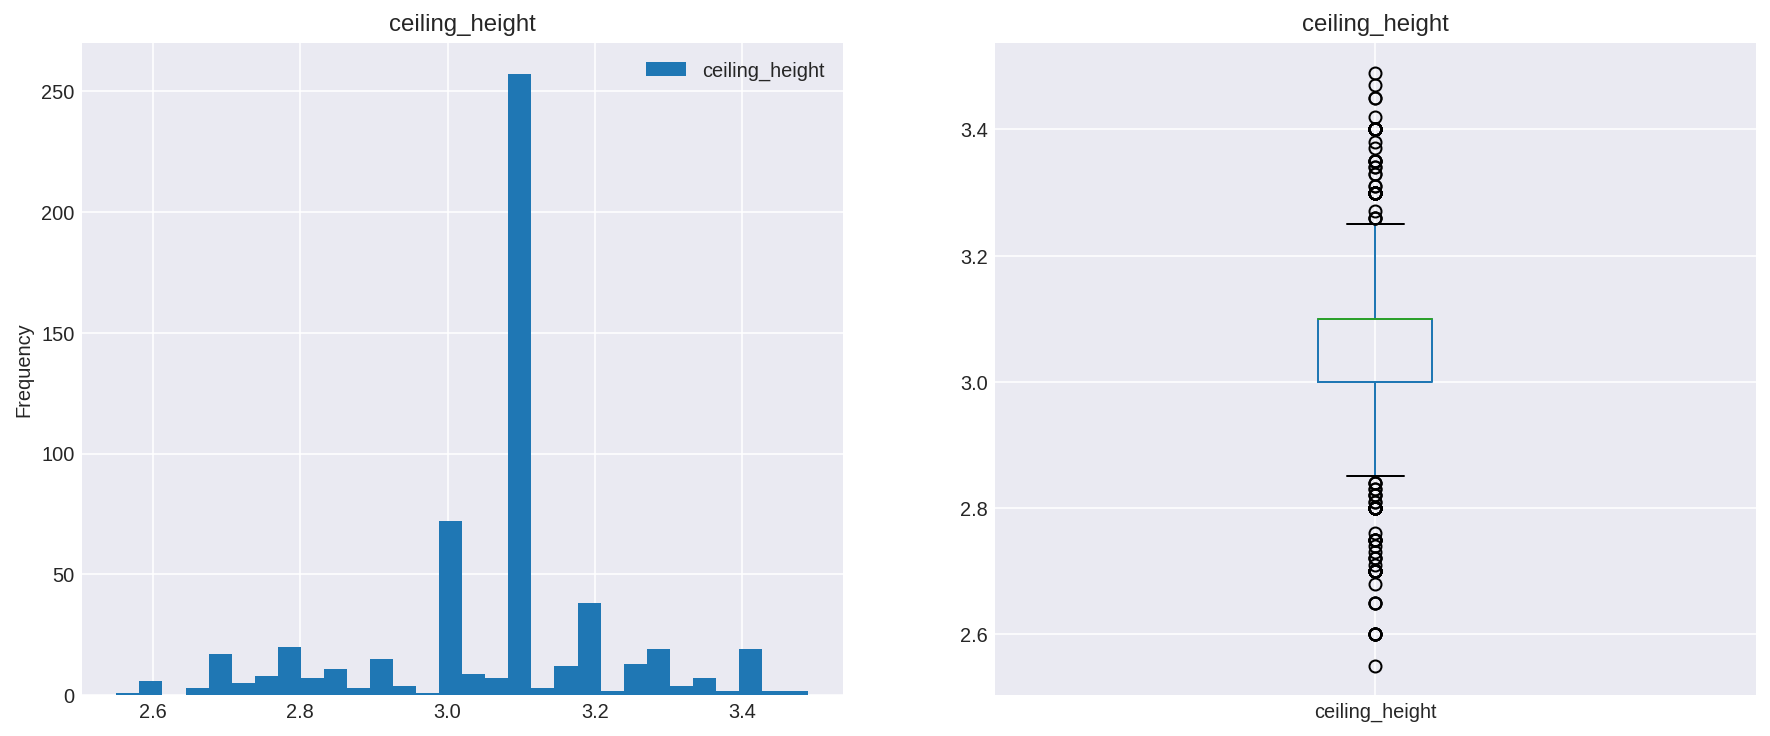

In [103]:
columns = ['total_area','last_price','rooms', 'ceiling_height']
for column in columns:
    figure, ax = plt.subplots(1,2,figsize=(15,6))
    center_spb.plot(kind='hist', y=column, bins=30, grid=True, ax=ax[0]);
    center_spb.boxplot(column,  ax=ax[1])
    ax[0].set_title(column)
    ax[1].set_title(column)                 
    plt.show()

Основные характеристики квартир в центре:
* По площади больше всего объявлений с квартирами от 40 до 100 квадратных метров, межквартильный размах составляет от 55 до 93 метров. На гистограмме выделяется несколько пиков, но немного чаще это квартиры с площадью 70 метров.
* Большинство предложений в центре от 4,9 до 10 млн, при этом у половины цена выше 6 миллионов. Наиболее часто встречается стоимость 8 млн.
* В основном квартиры имеют две или три комнаты, двухкомнатных квартир немного больше.
* По высоте потолков значительно выделяется пик 3,1 метра.

**Площадь квартиры**

Выводим сводную таблицу с помощью функции 'func_pivot_table':

In [104]:
func_pivot_table(center_spb, 'total_area_group')

,count,median,min,max
total_area_group,,,,
"(71.2, 130.0]",298,9500000,4900000,39000000
"(56.3, 71.2]",119,7500000,4000000,20000000
"(45.0, 56.3]",81,5600000,3100000,14900000
"(37.0, 45.0]",38,5125000,2750000,14948000
"(12.999, 37.0]",33,4200000,2100000,12000000


При увеличении площади цена тоже возрастает. Посмотрим график и корреляцию:

Процент корреляции:  0.634


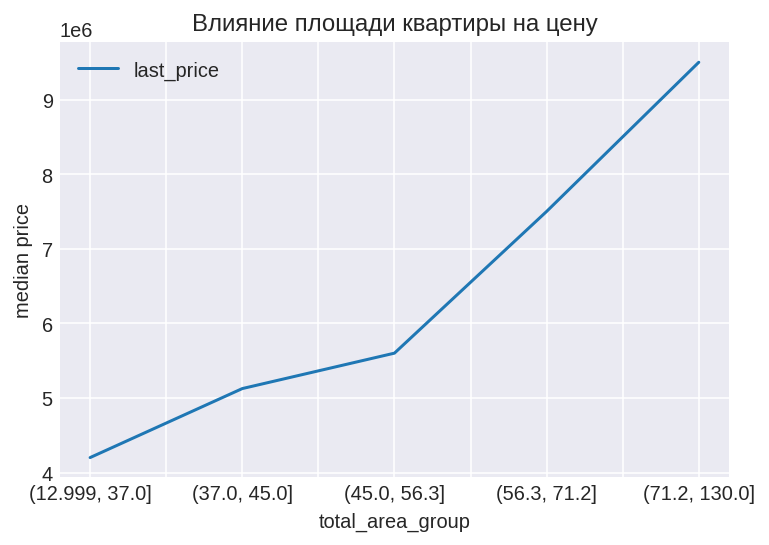

In [105]:
func_plot(center_spb, 'total_area_group', 'Влияние площади квартиры на цену', 'total_area');

Корреляция составляет 63 процентов, что означает среднюю связь цены и площади.

**Количество комнат**

Рассмотрим сводную таблицу по числу комнат:

In [106]:
func_pivot_table(center_spb, 'rooms')

,count,median,min,max
rooms,,,,
6,3,12990000,9100000,16550000
5,19,11300000,7500000,19500000
4,82,9600000,6300000,39000000
3,185,8500000,4900000,25000000
2,208,6925000,3500000,37000000
1,68,5075000,2385000,14900000
0,4,2638000,2100000,3200000


В таблице наблюдается рост цен по медиане по мере увеличения комнат.

Процент корреляции:  0.362


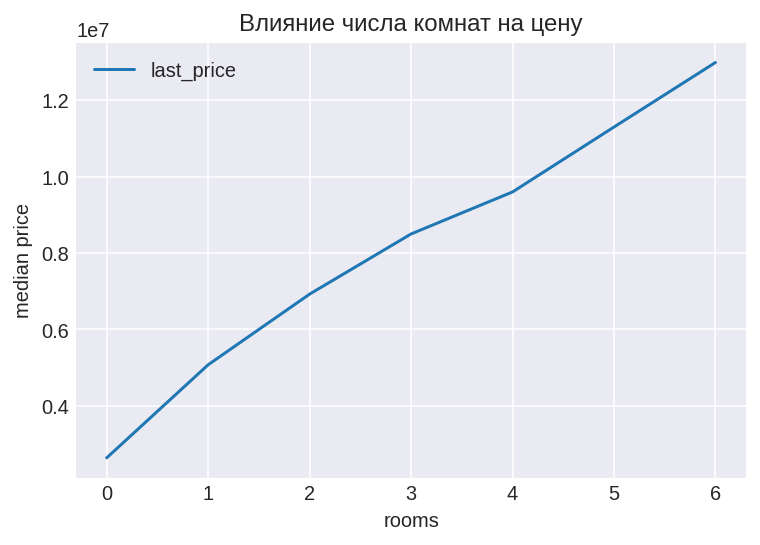

In [107]:
func_plot(center_spb, 'rooms', 'Влияние числа комнат на цену', 'rooms');

Хотя в целом на графике виден рост цен, корреляция 0,36 процента говорит о слабом влиянии числа комнат на цену.

**Этажность**

Строим сводную таблицу по зависимости цены и этажности:

In [108]:
func_pivot_table(center_spb, 'floor_group')

,count,median,min,max
floor_group,,,,
другой,324,8350000,2385000,37000000
последний,146,8350000,3750000,39000000
первый,99,5875000,2100000,22400000


Наиболее высокая цена в группе другой и низкая, если квартира расположена на первом этаже. Построим график:

Процент корреляции:  0.195


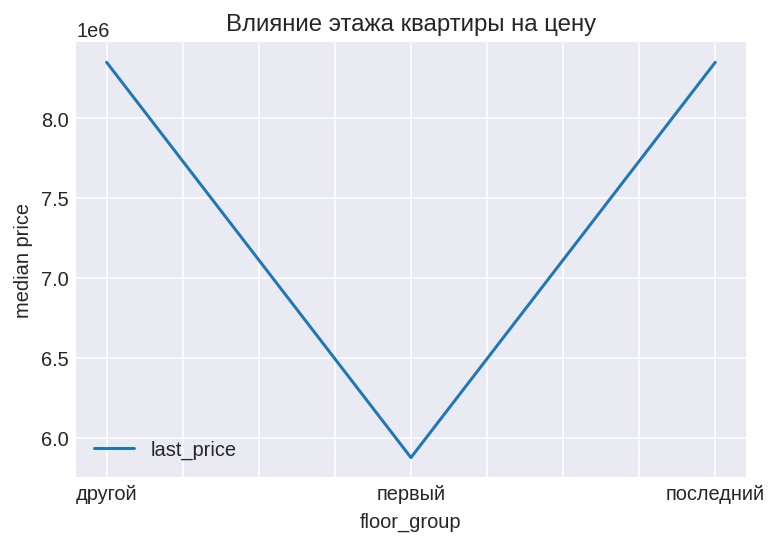

In [109]:
func_plot(center_spb, 'floor_group', 'Влияние этажа квартиры на цену', 'floor');

Линейной связи нет, корреляция очень слабая. Только первый этаж существенно влияет на цену. 

**Удаленность от центра**

Создаём сводную таблицу по зависимости цены от удаленности от центра:

In [110]:
func_pivot_table(center_spb, 'city_centers_nearest')

,count,median,min,max
city_centers_nearest,,,,
1,100,9200000,3380000,37000000
0,37,8600000,3500000,26000000
2,155,8200000,2100000,39000000
3,277,7500000,2176000,26500000


Самая высокая медиана цены у квартир, расположенных на расстоянии 1 километр.

Процент корреляции:  -0.178


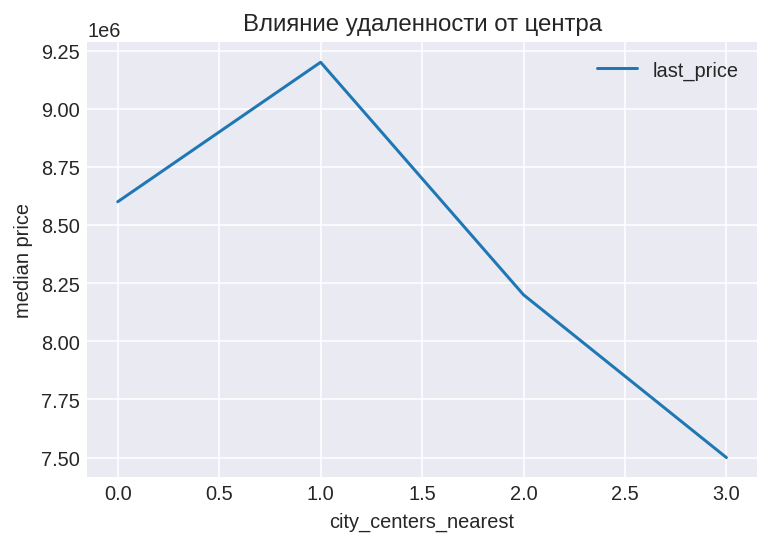

In [111]:
func_plot(center_spb, 'city_centers_nearest', 'Влияние удаленности от центра', 'city_centers_nearest');

Линейной связи нет, при удаленности от 1 километра цена снижается.

**Влияние дня недели на цену**

Строим сводную таблицу для выявления зависимости между днём публикации и ценой:

In [112]:
weekday_pivot_center = func_pivot_table(center_spb, 'weekday_exposition_id')
weekday_pivot_center.reset_index().replace({'weekday_exposition_id': dict_weekday.weekday_exposition.to_dict()})

,weekday_exposition_id,count,median,min,max
0,Sunday,38,9050000,2100000,26500000
1,Monday,76,8349500,2645000,22000000
2,Friday,110,8230000,2176000,26000000
3,Wednesday,96,8150000,3100000,25000000
4,Tuesday,95,7990000,2385000,23600000
5,Saturday,46,7499500,2750000,19837000
6,Thursday,108,7325000,3290000,39000000


В четверг самая низкая цена и в воскресенье самая высокая.

Процент корреляции:  0.022


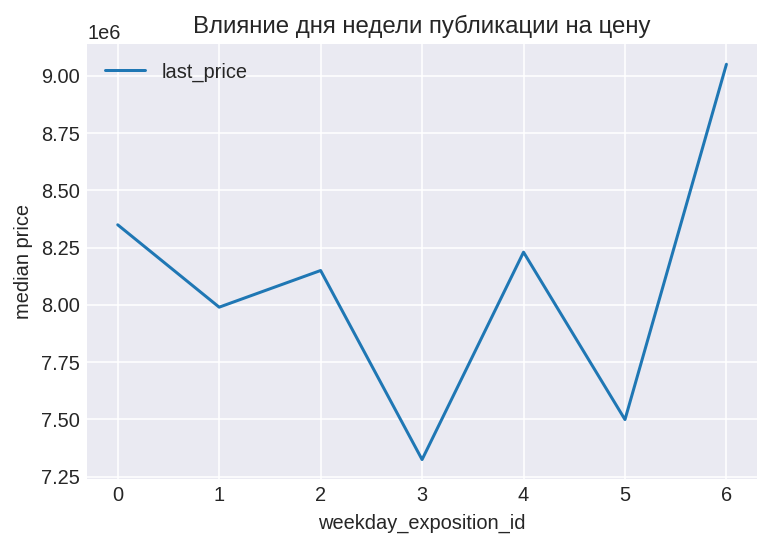

In [113]:
func_plot(center_spb, 'weekday_exposition_id', 'Влияние дня недели публикации на цену', 'weekday_exposition_id');

Корреляция равна нулю, связи между днём недели и ценой нет.

**Влияние месяца публикации на цену**

Рассмотрим, влияет ли месяц публикации на стоимость квартир:

In [114]:
month_pivot_center = func_pivot_table(center_spb, 'month_exposition_id')
month_pivot_center.reset_index().replace({'month_exposition_id': dict_month.month_exposition.to_dict()})

,month_exposition_id,count,median,min,max
0,January,29,8700000,2800000,22000000
1,September,59,8500000,2800000,19999000
2,June,47,8299000,3500000,26500000
3,April,41,8200000,3370000,24500000
4,February,64,8130000,4000000,21000000
5,July,48,8000000,3200000,18000000
6,March,44,7995000,3290000,25000000
7,October,39,7600000,4300000,17000000
8,May,34,7481500,2750000,20900000
9,November,72,7425000,3750000,37000000


По сводной таблице связи не видно. Наиболее высокая цена в январе, затем идут сентябрь и июнь, самая низкая стоимость в декабре. Построим график и подсчитаем корреляцию:

Процент корреляции:  -0.068


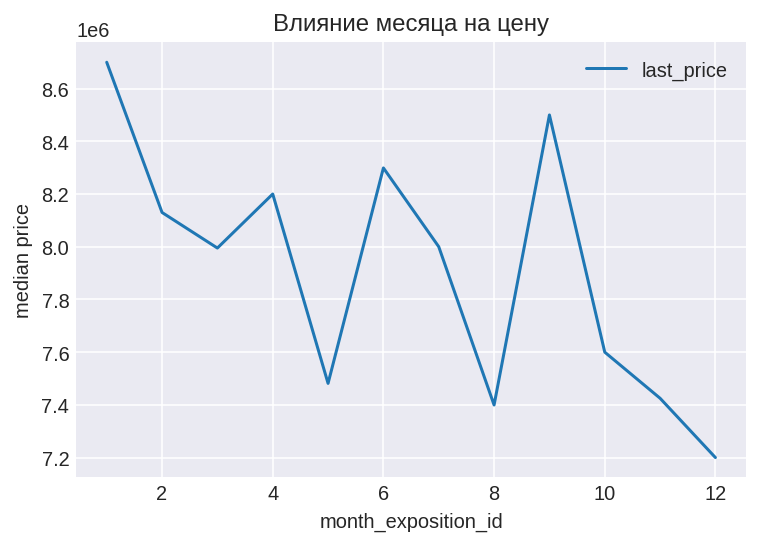

In [115]:
func_plot(center_spb, 'month_exposition_id', 'Влияние месяца на цену', 'month_exposition_id');

И график и корреляция показывают отсутствие взаимосвязи между месяцем и ценой.

**Влияние года публикации на цену**

Создаём сводную таблицу для оценки зависимости между годом и ценой:

In [116]:
func_pivot_table(center_spb, 'year_exposition_id')

,count,median,min,max
year_exposition_id,,,,
2016,69,9000000.0,2750000,20900000
2018,208,8000902.5,2385000,37000000
2019,23,7990000.0,4200000,20000000
2017,247,7600000.0,2100000,39000000
2015,22,6750000.0,4050000,14000000


Самая низкая цена была в 2015 году и самая высокая в 2016. Построим график:

Процент корреляции:  0.035


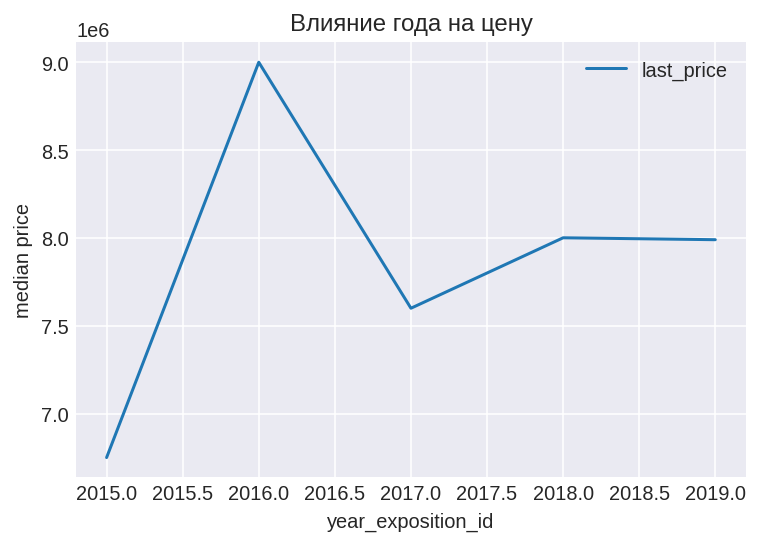

In [117]:
func_plot(center_spb, 'year_exposition_id', 'Влияние года на цену', 'year_exposition_id');

Линейной связи между годом и ценой нет. На графике видно, что цена менялась скачками.

<div style="border: solid green 2px; padding: 20px">
    
**Вывод**
 * В основном на стоимость квартир в центре влияет площадь, корреляция 0,63.
 * Количество комнат тоже имеет значение, но зависимость значительно меньше, корреляция 0,36.
 * Для первого этажа цена ниже, чем на любых других этажах.
 * При удаленности от центра цена становится меньше после 1 километра, линейной связи нет.    
 * Корреляция между датой публикации и ценой отсутствует.</div>

<a name="4"><h2>4 Общие выводы</h2></a>

В работе были рассмотрены площадь, цена, высота потолков и этажность квартир Санкт-Петербурга и Ленинградской области, отдельно те же параметры были проанализированы для центра Санкт-Петербурга.    
    
В результате выявлено:    
* Большинство квартир в объявлениях имеют площадь от 40 до 69 метров, в центре города это значение отличается, здесь половина квартир имеют площадь от 40 до 100 метров.  
* Стоимость недвижимости в основном варьируется от 3 до 5 миллионов, но в центре цена выше и половина квартир имеют стоимость от 6 до 10 миллионов. Средняя цена для центра больше на 3,5 миллиона.
* В центре наиболее часто встречаются предложения с двухкомнатными квартирами, тогда как по всему городу однокомнатных и двухкомнатных квартир примерно одинаково. 
* Высота потолков в центре в основном выше и составляет 3,1 метра, а по данным всей таблицы высота 2,7 метра.   
    
Анализ времени продаж показал, что большинство квартир продаются за период 95 дней, при этом максимум продаж на 45 день.
    
Далее в работе были рассмотрены 10 населенных пунктов с наибольшим количеством объявлений:
* Среди них значительно выделяется количество предложений в Санкт-Петербурге (10022 объявлений), далее идут Мурино, Кудрово и Шушары с количеством 503, 399 и 359 предложений соответственно.
* По средней цене квадратного метра тоже на первом месте Санкт Петербург (103615 за кв.м). К дорогим районам ещё можно отнести Пушкин (99865), Кудрово (94758) и Парголово (91472).
    
Также были изучены факторы, влияющие на стоимость квартир:
* Определели, что в Санкт-Петербурге самое большое влияние на цену оказывает расположение, при этом в центральной части Санкт-Петербурга  цена до 1 километра сначала возрастает и только потом снижается. В Ленинградской области удаленность от центра не имеет значения, вероятнее всего влияют особенности местоположения.
* Также есть связь цены и площади квартиры, корреляция составляет 0,71% для всего города и области и 0,63% для центра, что говорит о средней связи.
* Было выявлено влияние количества комнат, но в меньшей степени, корреляция 0,46% для всего города и области и 0,36% для центра.
* Если этаж первый, то цена ниже. Это характерно для всех районов.


По дате публикации установили:
* День недели и месяц не влияют на стоимость.
* В центре не оказалось связи между годом и ценой, хотя по данным всей таблицы был виден рост цен начиная с 2016 года. При этом минимум и максиму по годам в центральной части и в других районах отличается, так в 2016 году были самые высокие цены для центра города по сравнению с другими периодами, а для данных всей таблицы в 2016 году цена была самая низкая.